#### Problem Statement: To predict the attrition of OLA drivers based on Demographics, Tenure information and Historical data regarding performance of the driver 

In [568]:
import pandas as pd
import numpy as np
import math
import re
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,roc_curve, mean_squared_error,precision_score, recall_score,f1_score,\
precision_recall_curve, classification_report, auc,RocCurveDisplay
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.impute import KNNImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.utils import resample
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_validate,GridSearchCV,RandomizedSearchCV
from xgboost import XGBClassifier

In [58]:
os.chdir(r'D:\Scaler_Notes\Scaler_Business_Cases')

In [59]:
df=pd.read_csv('Ola_business_case_study.csv',sep=',',parse_dates=True)

In [60]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [61]:
df

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [63]:
df['Dateofjoining']=pd.to_datetime(df['Dateofjoining'])
df['LastWorkingDate']=pd.to_datetime(df['LastWorkingDate'])

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  object        
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [65]:
df.rename(columns={'MMM-YY':'MonthlyReportingDate'},inplace=True)

In [66]:
df

,MonthlyReportingDate,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08/01/20,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,740280,3
19100,09/01/20,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,448370,3
19101,10/01/20,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,0,2
19102,11/01/20,2788,30.0,0.0,C27,2,70254,2020-06-08,NaT,2,2,200420,2


In [71]:
df['Driver_ID'].unique()

array([   1,    2,    4, ..., 2786, 2787, 2788], dtype=int64)

### Aggregated DataFrame

In [113]:
df['Total Business Value'].unique()

array([2381060, -665480,       0, ...,  497690,  740280,  448370],
      dtype=int64)

In [72]:
#Checking the Pattern of MonthlyReportingDate
df.loc[df['Driver_ID']==4]

,MonthlyReportingDate,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
5,12/01/19,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,0,1
6,01/01/20,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,0,1
7,02/01/20,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,0,1
8,03/01/20,4,43.0,0.0,C13,2,65603,2019-12-07,NaT,2,2,350000,1
9,04/01/20,4,43.0,0.0,C13,2,65603,2019-12-07,2020-04-27,2,2,0,1


In [672]:
agg_df=df.groupby('Driver_ID').agg({'MonthlyReportingDate':'last','Age':['first'],
                            'Gender':'first','City':['first','last'],'Education_Level':['first','last'],\
                            'Income':['first','last','mean'],'Dateofjoining':'first','LastWorkingDate':'last',
                            'Joining Designation':['last'],'Grade':['first','last'],'Total Business Value':['mean','median'],\
                            'Quarterly Rating':['first','last']})

In [673]:
agg_df

MonthlyReportingDate   Age Gender  City      Education_Level       \
                          last first  first first last           first last   
Driver_ID                                                                     
1                     03/01/19  28.0    0.0   C23  C23               2    2   
2                     12/01/20  31.0    0.0    C7   C7               2    2   
4                     04/01/20  43.0    0.0   C13  C13               2    2   
5                     03/01/19  29.0    0.0    C9   C9               0    0   
6                     12/01/20  31.0    1.0   C11  C11               1    1   
...                        ...   ...    ...   ...  ...             ...  ...   
2784                  12/01/20  33.0    0.0   C24  C24               0    0   
2785                  10/01/20  34.0    1.0    C9   C9               0    0   
2786                  09/01/19  44.0    0.0   C19  C19               0    0   
2787                  06/01/19  28.0    1.0   C20  C20               2    2   
2788                  12/01/20  29.0    0.0   C27  C27               2    2   

          Income                 Dateofjoining LastWorkingDate  \
           first   last     mean         first            last   
Driver_ID                                                        
1          57387  57387  57387.0    2018-12-24      2019-03-11   
2          67016  67016  67016.0    2020-11-06             NaT   
4          65603  65603  65603.0    2019-12-07      2020-04-27   
5          46368  46368  46368.0    2019-01-09      2019-03-07   
6          78728  78728  78728.0    2020-07-31             NaT   
...          ...    ...      ...           ...             ...   
2784       82815  82815  82815.0    2015-10-15             NaT   
2785       12105  12105  12105.0    2020-08-28      2020-10-28   
2786       35370  35370  35370.0    2018-07-31      2019-09-22   
2787       69498  69498  69498.0    2018-07-21      2019-06-20   
2788       70254  70254  70254.0    2020-06-08             NaT   

          Joining Designation Grade      Total Business Value            \
                         last first last                 mean    median   
Driver_ID                                                                 
1                           1     1    1        571860.000000       0.0   
2                           2     2    2             0.000000       0.0   
4                           2     2    2         70000.000000       0.0   
5                           1     1    1         40120.000000       0.0   
6                           3     3    3        253000.000000       0.0   
...                       ...   ...  ...                  ...       ...   
2784                        2     3    3        906200.833333  335690.0   
2785                        1     1    1             0.000000       0.0   
2786                        2     2    2        312787.777778  318460.0   
2787                        1     1    1        162971.666667  125000.0   
2788                        2     2    2        328320.000000  411480.0   

          Quarterly Rating       
                     first last  
Driver_ID                        
1                        2    2  
2                        1    1  
4                        1    1  
5                        1    1  
6                        1    2  
...                    ...  ...  
2784                     3    4  
2785                     1    1  
2786                     2    1  
2787                     2    1  
2788                     1    2  

[2381 rows x 19 columns]

In [674]:
agg_df.columns

MultiIndex([('MonthlyReportingDate',   'last'),
            (                 'Age',  'first'),
            (              'Gender',  'first'),
            (                'City',  'first'),
            (                'City',   'last'),
            (     'Education_Level',  'first'),
            (     'Education_Level',   'last'),
            (              'Income',  'first'),
            (              'Income',   'last'),
            (              'Income',   'mean'),
            (       'Dateofjoining',  'first'),
            (     'LastWorkingDate',   'last'),
            ( 'Joining Designation',   'last'),
            (               'Grade',  'first'),
            (               'Grade',   'last'),
            ('Total Business Value',   'mean'),
            ('Total Business Value', 'median'),
            (    'Quarterly Rating',  'first'),
            (    'Quarterly Rating',   'last')],
           )

In [675]:
agg_df.columns =["_".join(col) for col in agg_df.columns]

In [676]:
agg_df=agg_df.reset_index()

In [677]:
agg_df

,Driver_ID,MonthlyReportingDate_last,Age_first,Gender_first,City_first,City_last,Education_Level_first,Education_Level_last,Income_first,Income_last,Income_mean,Dateofjoining_first,LastWorkingDate_last,Joining Designation_last,Grade_first,Grade_last,Total Business Value_mean,Total Business Value_median,Quarterly Rating_first,Quarterly Rating_last
0,1,03/01/19,28.0,0.0,C23,C23,2,2,57387,57387,57387.0,2018-12-24,2019-03-11,1,1,1,571860.000000,0.0,2,2
1,2,12/01/20,31.0,0.0,C7,C7,2,2,67016,67016,67016.0,2020-11-06,NaT,2,2,2,0.000000,0.0,1,1
2,4,04/01/20,43.0,0.0,C13,C13,2,2,65603,65603,65603.0,2019-12-07,2020-04-27,2,2,2,70000.000000,0.0,1,1
3,5,03/01/19,29.0,0.0,C9,C9,0,0,46368,46368,46368.0,2019-01-09,2019-03-07,1,1,1,40120.000000,0.0,1,1
4,6,12/01/20,31.0,1.0,C11,C11,1,1,78728,78728,78728.0,2020-07-31,NaT,3,3,3,253000.000000,0.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,12/01/20,33.0,0.0,C24,C24,0,0,82815,82815,82815.0,2015-10-15,NaT,2,3,3,906200.833333,335690.0,3,4
2377,2785,10/01/20,34.0,1.0,C9,C9,0,0,12105,12105,12105.0,2020-08-28,2020-10-28,1,1,1,0.000000,0.0,1,1
2378,2786,09/01/19,44.0,0.0,C19,C19,0,0,35370,35370,35370.0,2018-07-31,2019-09-22,2,2,2,312787.777778,318460.0,2,1
2379,2787,06/01/19,28.0,1.0,C20,C20,2,2,69498,69498,69498.0,2018-07-21,2019-06-20,1,1,1,162971.666667,125000.0,2,1


## Feature Engineering

#### Creation of Target Variable

In [678]:
agg_df['Target']=agg_df['LastWorkingDate_last'].apply(lambda x: 0 if pd.isnull(x) else 1 )

In [679]:
agg_df

,Driver_ID,MonthlyReportingDate_last,Age_first,Gender_first,City_first,City_last,Education_Level_first,Education_Level_last,Income_first,Income_last,Income_mean,Dateofjoining_first,LastWorkingDate_last,Joining Designation_last,Grade_first,Grade_last,Total Business Value_mean,Total Business Value_median,Quarterly Rating_first,Quarterly Rating_last,Target
0,1,03/01/19,28.0,0.0,C23,C23,2,2,57387,57387,57387.0,2018-12-24,2019-03-11,1,1,1,571860.000000,0.0,2,2,1
1,2,12/01/20,31.0,0.0,C7,C7,2,2,67016,67016,67016.0,2020-11-06,NaT,2,2,2,0.000000,0.0,1,1,0
2,4,04/01/20,43.0,0.0,C13,C13,2,2,65603,65603,65603.0,2019-12-07,2020-04-27,2,2,2,70000.000000,0.0,1,1,1
3,5,03/01/19,29.0,0.0,C9,C9,0,0,46368,46368,46368.0,2019-01-09,2019-03-07,1,1,1,40120.000000,0.0,1,1,1
4,6,12/01/20,31.0,1.0,C11,C11,1,1,78728,78728,78728.0,2020-07-31,NaT,3,3,3,253000.000000,0.0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,12/01/20,33.0,0.0,C24,C24,0,0,82815,82815,82815.0,2015-10-15,NaT,2,3,3,906200.833333,335690.0,3,4,0
2377,2785,10/01/20,34.0,1.0,C9,C9,0,0,12105,12105,12105.0,2020-08-28,2020-10-28,1,1,1,0.000000,0.0,1,1,1
2378,2786,09/01/19,44.0,0.0,C19,C19,0,0,35370,35370,35370.0,2018-07-31,2019-09-22,2,2,2,312787.777778,318460.0,2,1,1
2379,2787,06/01/19,28.0,1.0,C20,C20,2,2,69498,69498,69498.0,2018-07-21,2019-06-20,1,1,1,162971.666667,125000.0,2,1,1


In [680]:
agg_df['Target'].value_counts()

1    1616
0     765
Name: Target, dtype: int64

In [681]:
agg_df.shape

(2381, 21)

#### Income Increased or not Flag

In [682]:
def income_inc_func(x):
    if x['Income_last']-x['Income_first']>0:
        return 1
    return 0

In [683]:
agg_df['Income_Increase']=agg_df[['Income_first','Income_last']].apply(income_inc_func,axis=1)

In [684]:
agg_df

,Driver_ID,MonthlyReportingDate_last,Age_first,Gender_first,City_first,City_last,Education_Level_first,Education_Level_last,Income_first,Income_last,Income_mean,Dateofjoining_first,LastWorkingDate_last,Joining Designation_last,Grade_first,Grade_last,Total Business Value_mean,Total Business Value_median,Quarterly Rating_first,Quarterly Rating_last,Target,Income_Increase
0,1,03/01/19,28.0,0.0,C23,C23,2,2,57387,57387,57387.0,2018-12-24,2019-03-11,1,1,1,571860.000000,0.0,2,2,1,0
1,2,12/01/20,31.0,0.0,C7,C7,2,2,67016,67016,67016.0,2020-11-06,NaT,2,2,2,0.000000,0.0,1,1,0,0
2,4,04/01/20,43.0,0.0,C13,C13,2,2,65603,65603,65603.0,2019-12-07,2020-04-27,2,2,2,70000.000000,0.0,1,1,1,0
3,5,03/01/19,29.0,0.0,C9,C9,0,0,46368,46368,46368.0,2019-01-09,2019-03-07,1,1,1,40120.000000,0.0,1,1,1,0
4,6,12/01/20,31.0,1.0,C11,C11,1,1,78728,78728,78728.0,2020-07-31,NaT,3,3,3,253000.000000,0.0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,12/01/20,33.0,0.0,C24,C24,0,0,82815,82815,82815.0,2015-10-15,NaT,2,3,3,906200.833333,335690.0,3,4,0,0
2377,2785,10/01/20,34.0,1.0,C9,C9,0,0,12105,12105,12105.0,2020-08-28,2020-10-28,1,1,1,0.000000,0.0,1,1,1,0
2378,2786,09/01/19,44.0,0.0,C19,C19,0,0,35370,35370,35370.0,2018-07-31,2019-09-22,2,2,2,312787.777778,318460.0,2,1,1,0
2379,2787,06/01/19,28.0,1.0,C20,C20,2,2,69498,69498,69498.0,2018-07-21,2019-06-20,1,1,1,162971.666667,125000.0,2,1,1,0


#### Quarterly Rating Increased or not  Flag

In [685]:
def rating_inc_func(x):
    if x['Quarterly Rating_last']-x['Quarterly Rating_first']>0:
        return 1
    return 0

In [686]:
agg_df['Rating_Increase']=agg_df[['Quarterly Rating_last','Quarterly Rating_first']].apply(rating_inc_func,axis=1)

In [687]:
agg_df

,Driver_ID,MonthlyReportingDate_last,Age_first,Gender_first,City_first,City_last,Education_Level_first,Education_Level_last,Income_first,Income_last,Income_mean,Dateofjoining_first,LastWorkingDate_last,Joining Designation_last,Grade_first,Grade_last,Total Business Value_mean,Total Business Value_median,Quarterly Rating_first,Quarterly Rating_last,Target,Income_Increase,Rating_Increase
0,1,03/01/19,28.0,0.0,C23,C23,2,2,57387,57387,57387.0,2018-12-24,2019-03-11,1,1,1,571860.000000,0.0,2,2,1,0,0
1,2,12/01/20,31.0,0.0,C7,C7,2,2,67016,67016,67016.0,2020-11-06,NaT,2,2,2,0.000000,0.0,1,1,0,0,0
2,4,04/01/20,43.0,0.0,C13,C13,2,2,65603,65603,65603.0,2019-12-07,2020-04-27,2,2,2,70000.000000,0.0,1,1,1,0,0
3,5,03/01/19,29.0,0.0,C9,C9,0,0,46368,46368,46368.0,2019-01-09,2019-03-07,1,1,1,40120.000000,0.0,1,1,1,0,0
4,6,12/01/20,31.0,1.0,C11,C11,1,1,78728,78728,78728.0,2020-07-31,NaT,3,3,3,253000.000000,0.0,1,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,12/01/20,33.0,0.0,C24,C24,0,0,82815,82815,82815.0,2015-10-15,NaT,2,3,3,906200.833333,335690.0,3,4,0,0,1
2377,2785,10/01/20,34.0,1.0,C9,C9,0,0,12105,12105,12105.0,2020-08-28,2020-10-28,1,1,1,0.000000,0.0,1,1,1,0,0
2378,2786,09/01/19,44.0,0.0,C19,C19,0,0,35370,35370,35370.0,2018-07-31,2019-09-22,2,2,2,312787.777778,318460.0,2,1,1,0,0
2379,2787,06/01/19,28.0,1.0,C20,C20,2,2,69498,69498,69498.0,2018-07-21,2019-06-20,1,1,1,162971.666667,125000.0,2,1,1,0,0


#### Is Changing City or not 

In [688]:
def city_change_func(x):
    if x['City_first']==x['City_last']:
        return 0
    return 1

In [689]:
agg_df['City_Change']=agg_df[['City_first','City_last']].apply(city_change_func,axis=1)

In [690]:
agg_df.isna().sum()

Driver_ID                        0
MonthlyReportingDate_last        0
Age_first                        0
Gender_first                     0
City_first                       0
City_last                        0
Education_Level_first            0
Education_Level_last             0
Income_first                     0
Income_last                      0
Income_mean                      0
Dateofjoining_first              0
LastWorkingDate_last           765
Joining Designation_last         0
Grade_first                      0
Grade_last                       0
Total Business Value_mean        0
Total Business Value_median      0
Quarterly Rating_first           0
Quarterly Rating_last            0
Target                           0
Income_Increase                  0
Rating_Increase                  0
City_Change                      0
dtype: int64

#### Is Grade Improved or not  

In [691]:
def grade_change_func(x):
    if x['Grade_last']>x['Grade_first']:
        return 1
    return 0
agg_df['Grade_inc_flag']=agg_df[['Grade_first','Grade_last']].apply(grade_change_func,axis=1)

In [692]:
agg_df.loc[agg_df['Grade_inc_flag']==1]

,Driver_ID,MonthlyReportingDate_last,Age_first,Gender_first,City_first,City_last,Education_Level_first,Education_Level_last,Income_first,Income_last,Income_mean,Dateofjoining_first,LastWorkingDate_last,Joining Designation_last,Grade_first,Grade_last,Total Business Value_mean,Total Business Value_median,Quarterly Rating_first,Quarterly Rating_last,Target,Income_Increase,Rating_Increase,City_Change,Grade_inc_flag
18,26,12/01/20,41.0,0.0,C14,C14,2,2,121529,132577,126132.333333,2018-05-07,NaT,1,3,4,2.911162e+06,1092225.0,4,2,0,1,0,0,1
40,54,12/01/20,33.0,0.0,C29,C29,1,1,117993,127826,121816.944444,2019-07-11,NaT,4,4,5,1.879072e+06,657215.0,2,1,0,1,0,0,1
46,60,12/01/20,46.0,1.0,C20,C20,0,0,82126,89592,83992.500000,2016-09-17,NaT,1,3,4,2.051063e+06,1414775.0,4,2,0,1,0,0,1
80,98,12/01/20,24.0,0.0,C16,C16,0,0,57977,63774,59000.000000,2019-08-15,2020-12-25,2,2,3,1.259732e+06,971130.0,3,2,1,1,0,0,1
230,275,12/01/20,39.0,0.0,C20,C20,0,0,89124,97226,91149.500000,2016-05-02,NaT,1,3,4,1.404075e+06,862775.0,3,3,0,1,0,0,1
256,307,10/01/20,37.0,0.0,C26,C26,0,0,80856,88207,81190.136364,2018-10-05,2020-10-26,2,3,4,2.583608e+06,1561200.0,4,1,1,1,0,0,1
267,320,12/01/20,27.0,1.0,C20,C20,0,0,56813,63126,58391.250000,2018-07-13,NaT,1,1,2,1.256403e+06,934290.0,4,4,0,1,0,0,1
312,368,12/01/20,43.0,0.0,C23,C23,1,1,46719,51911,47368.000000,2018-09-18,NaT,1,1,2,1.286220e+06,1307000.0,4,4,0,1,0,0,1
368,434,12/01/20,28.0,1.0,C6,C6,2,2,80469,88515,82480.500000,2017-08-11,NaT,1,2,3,2.153367e+06,1713110.0,4,4,0,1,0,0,1
460,537,12/01/20,34.0,1.0,C29,C29,1,1,76868,84554,78641.692308,2019-12-06,NaT,2,2,3,1.798186e+06,1391140.0,1,4,0,1,1,0,1


#### Education Level Difference 

In [693]:
agg_df['Edu_level_diff']=agg_df['Education_Level_last']-agg_df['Education_Level_first']

In [694]:
agg_df['Edu_level_diff'].unique()

array([0], dtype=int64)

Since it doesn't provide any info we will drop this variable

In [651]:
agg_df.drop(['Edu_level_diff'],inplace=True,axis=1)

### Rough Work

In [652]:
#df1_copy=df[['Driver_ID','Quarterly Rating']].copy()

In [653]:
#agg_df=pd.DataFrame()
#agg_df['Quarterly Rating']=df1_copy.groupby(['Driver_ID'])['Quarterly Rating'].mean()
#agg_df['Rating_Increased']=df1_copy.groupby(['Driver_ID'])['Quarterly Rating'].apply(lambda x:1 if x.iloc[-1]>x.iloc[0] else 0 )
#agg_df

In [131]:
#df1_copy.groupby('Driver_ID')['Quarterly Rating'].mean()

In [132]:
#df['Target']

In [133]:
#df.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate'].to_dict()

In [127]:
#df['Target']=df['Driver_ID'].map(df.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate'].to_dict())

In [128]:
#df['Target']

In [654]:
agg_df

,Driver_ID,MonthlyReportingDate_last,Age_first,Gender_first,City_first,City_last,Education_Level_first,Education_Level_last,Income_first,Income_last,Income_mean,Dateofjoining_first,LastWorkingDate_last,Joining Designation_last,Grade_first,Grade_last,Total Business Value_mean,Total Business Value_median,Quarterly Rating_first,Quarterly Rating_last,Target,Income_Increase,Rating_Increase,City_Change,Grade_inc_flag
0,1,03/01/19,28.0,0.0,C23,C23,2,2,57387,57387,57387.0,2018-12-24,2019-03-11,1,1,1,571860.000000,0.0,2,2,1,0,0,0,0
1,2,12/01/20,31.0,0.0,C7,C7,2,2,67016,67016,67016.0,2020-11-06,NaT,2,2,2,0.000000,0.0,1,1,0,0,0,0,0
2,4,04/01/20,43.0,0.0,C13,C13,2,2,65603,65603,65603.0,2019-12-07,2020-04-27,2,2,2,70000.000000,0.0,1,1,1,0,0,0,0
3,5,03/01/19,29.0,0.0,C9,C9,0,0,46368,46368,46368.0,2019-01-09,2019-03-07,1,1,1,40120.000000,0.0,1,1,1,0,0,0,0
4,6,12/01/20,31.0,1.0,C11,C11,1,1,78728,78728,78728.0,2020-07-31,NaT,3,3,3,253000.000000,0.0,1,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,12/01/20,33.0,0.0,C24,C24,0,0,82815,82815,82815.0,2015-10-15,NaT,2,3,3,906200.833333,335690.0,3,4,0,0,1,0,0
2377,2785,10/01/20,34.0,1.0,C9,C9,0,0,12105,12105,12105.0,2020-08-28,2020-10-28,1,1,1,0.000000,0.0,1,1,1,0,0,0,0
2378,2786,09/01/19,44.0,0.0,C19,C19,0,0,35370,35370,35370.0,2018-07-31,2019-09-22,2,2,2,312787.777778,318460.0,2,1,1,0,0,0,0
2379,2787,06/01/19,28.0,1.0,C20,C20,2,2,69498,69498,69498.0,2018-07-21,2019-06-20,1,1,1,162971.666667,125000.0,2,1,1,0,0,0,0


### Exploratory Data Analysis

In [200]:
agg_df

,Driver_ID,MonthlyReportingDate_last,Age_first,Gender_first,City_first,City_last,Education_Level_count,Education_Level_min,Education_Level_max,Income_first,Income_last,Income_mean,Dateofjoining_first,LastWorkingDate_last,Joining Designation_first,Grade_first,Total Business Value_mean,Total Business Value_median,Quarterly Rating_first,Quarterly Rating_last
0,1,03/01/19,28.0,0.0,C23,C23,3,2,2,57387,57387,57387.0,2018-12-24,2019-03-11,1,1,571860.000000,0.0,2,2
1,2,12/01/20,31.0,0.0,C7,C7,2,2,2,67016,67016,67016.0,2020-11-06,NaT,2,2,0.000000,0.0,1,1
2,4,04/01/20,43.0,0.0,C13,C13,5,2,2,65603,65603,65603.0,2019-12-07,2020-04-27,2,2,70000.000000,0.0,1,1
3,5,03/01/19,29.0,0.0,C9,C9,3,0,0,46368,46368,46368.0,2019-01-09,2019-03-07,1,1,40120.000000,0.0,1,1
4,6,12/01/20,31.0,1.0,C11,C11,5,1,1,78728,78728,78728.0,2020-07-31,NaT,3,3,253000.000000,0.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,12/01/20,33.0,0.0,C24,C24,24,0,0,82815,82815,82815.0,2015-10-15,NaT,2,3,906200.833333,335690.0,3,4
2377,2785,10/01/20,34.0,1.0,C9,C9,3,0,0,12105,12105,12105.0,2020-08-28,2020-10-28,1,1,0.000000,0.0,1,1
2378,2786,09/01/19,44.0,0.0,C19,C19,9,0,0,35370,35370,35370.0,2018-07-31,2019-09-22,2,2,312787.777778,318460.0,2,1
2379,2787,06/01/19,28.0,1.0,C20,C20,6,2,2,69498,69498,69498.0,2018-07-21,2019-06-20,1,1,162971.666667,125000.0,2,1


#### Mean age of the Drivers

In [136]:
agg_df['Age_first'].mean()

33.090718185636284

<Axes: xlabel='Age_first', ylabel='Density'>

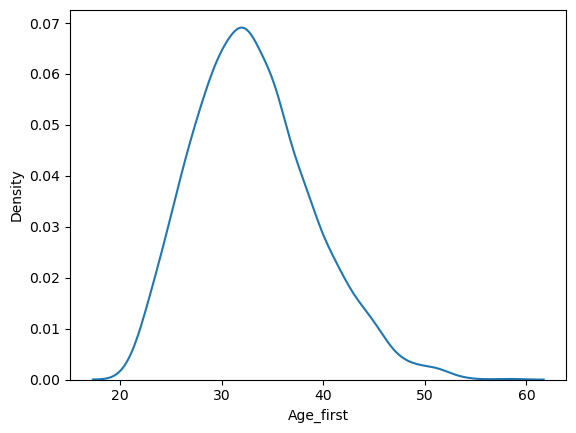

In [150]:
sns.kdeplot(agg_df['Age_first'])

<BarContainer object of 2 artists>

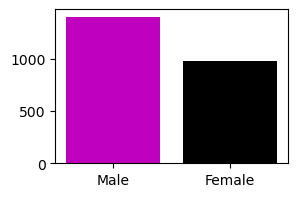

In [163]:
plt.figure(figsize=(3,2))
i=agg_df['Gender_first'].value_counts().index=['Male','Female']
plt.bar(i,agg_df['Gender_first'].value_counts().values, color=['m','black'])

The number of Male drivers are more as compared to Female Drivers

#### City wise Distribution 

<BarContainer object of 29 artists>

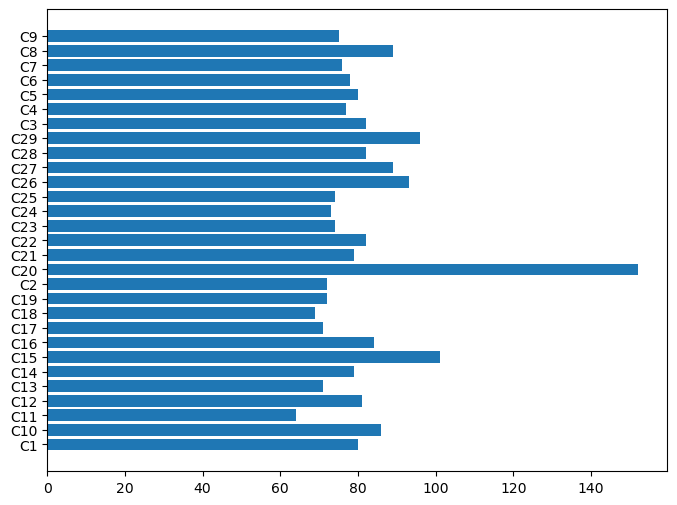

In [167]:
plt.figure(figsize=(8,6))
agg_df.groupby('City_first').size()
plt.barh(agg_df.groupby('City_first').size().index, agg_df.groupby('City_first').size().values)

City C20 has the most number of Drivers

<BarContainer object of 29 artists>

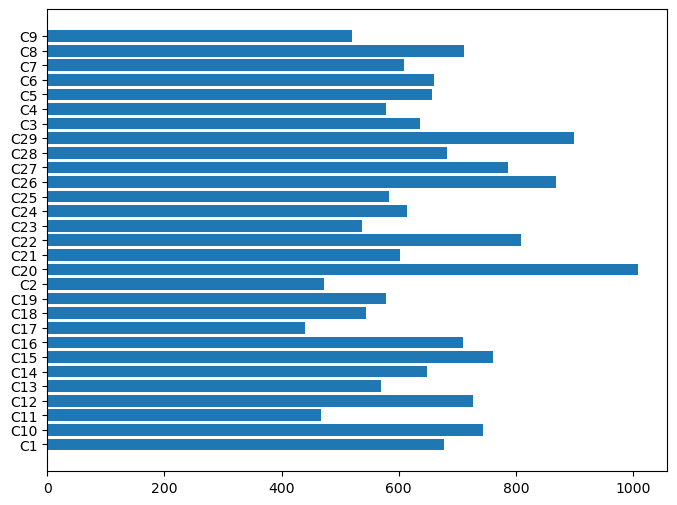

In [179]:
plt.figure(figsize=(8,6))
agg_df.groupby('City_first')['Education_Level_count'].sum()
plt.barh(agg_df.groupby('City_first')['Education_Level_count'].sum().index, \
         agg_df.groupby('City_first')['Education_Level_count'].sum().values)

Drivers belonging to City C20 are the most Educated

In [208]:
t=agg_df[['Gender_first','Income_mean']].copy()

In [212]:
t['Gender_first']=t['Gender_first'].map({0.0:'Male',1.0:'Female'})

<Axes: xlabel='Income_mean', ylabel='Density'>

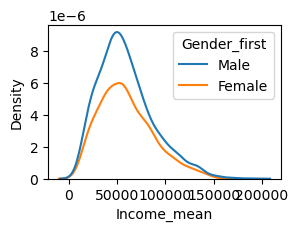

In [215]:
plt.figure(figsize=(3,2))
sns.kdeplot(data=t,x='Income_mean',hue='Gender_first')

In [217]:
t

,Gender_first,Income_mean
0,Male,57387.0
1,Male,67016.0
2,Male,65603.0
3,Male,46368.0
4,Female,78728.0
...,...,...
2376,Male,82815.0
2377,Female,12105.0
2378,Male,35370.0
2379,Female,69498.0


In [216]:
t.groupby('Gender_first')['Income_mean'].mean()

Gender_first
Female    59465.833887
Male      59070.063181
Name: Income_mean, dtype: float64

The mean income across Male and Female are almost the same

In [218]:
df['Grade'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [231]:
agg_df

,Driver_ID,MonthlyReportingDate_last,Age_first,Gender_first,City_first,City_last,Education_Level_count,Education_Level_min,Education_Level_max,Income_first,...,Dateofjoining_first,LastWorkingDate_last,Joining Designation_first,Grade_first,Grade_last,Total Business Value_mean,Total Business Value_median,Quarterly Rating_first,Quarterly Rating_last,Grade_inc_flag
0,1,03/01/19,28.0,0.0,C23,C23,3,2,2,57387,...,2018-12-24,2019-03-11,1,1,1,571860.000000,0.0,2,2,0
1,2,12/01/20,31.0,0.0,C7,C7,2,2,2,67016,...,2020-11-06,NaT,2,2,2,0.000000,0.0,1,1,0
2,4,04/01/20,43.0,0.0,C13,C13,5,2,2,65603,...,2019-12-07,2020-04-27,2,2,2,70000.000000,0.0,1,1,0
3,5,03/01/19,29.0,0.0,C9,C9,3,0,0,46368,...,2019-01-09,2019-03-07,1,1,1,40120.000000,0.0,1,1,0
4,6,12/01/20,31.0,1.0,C11,C11,5,1,1,78728,...,2020-07-31,NaT,3,3,3,253000.000000,0.0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,12/01/20,33.0,0.0,C24,C24,24,0,0,82815,...,2015-10-15,NaT,2,3,3,906200.833333,335690.0,3,4,0
2377,2785,10/01/20,34.0,1.0,C9,C9,3,0,0,12105,...,2020-08-28,2020-10-28,1,1,1,0.000000,0.0,1,1,0
2378,2786,09/01/19,44.0,0.0,C19,C19,9,0,0,35370,...,2018-07-31,2019-09-22,2,2,2,312787.777778,318460.0,2,1,0
2379,2787,06/01/19,28.0,1.0,C20,C20,6,2,2,69498,...,2018-07-21,2019-06-20,1,1,1,162971.666667,125000.0,2,1,0


#### Number of Drivers whose grade increased 

In [233]:
agg_df['Grade_inc_flag'].value_counts()

0    2338
1      43
Name: Grade_inc_flag, dtype: int64

43 drivers had their grade increased during the service

### Bivariate Plots

In [264]:
agg_df['Date_of_Joining_month']=agg_df['Dateofjoining_first'].dt.month_name()

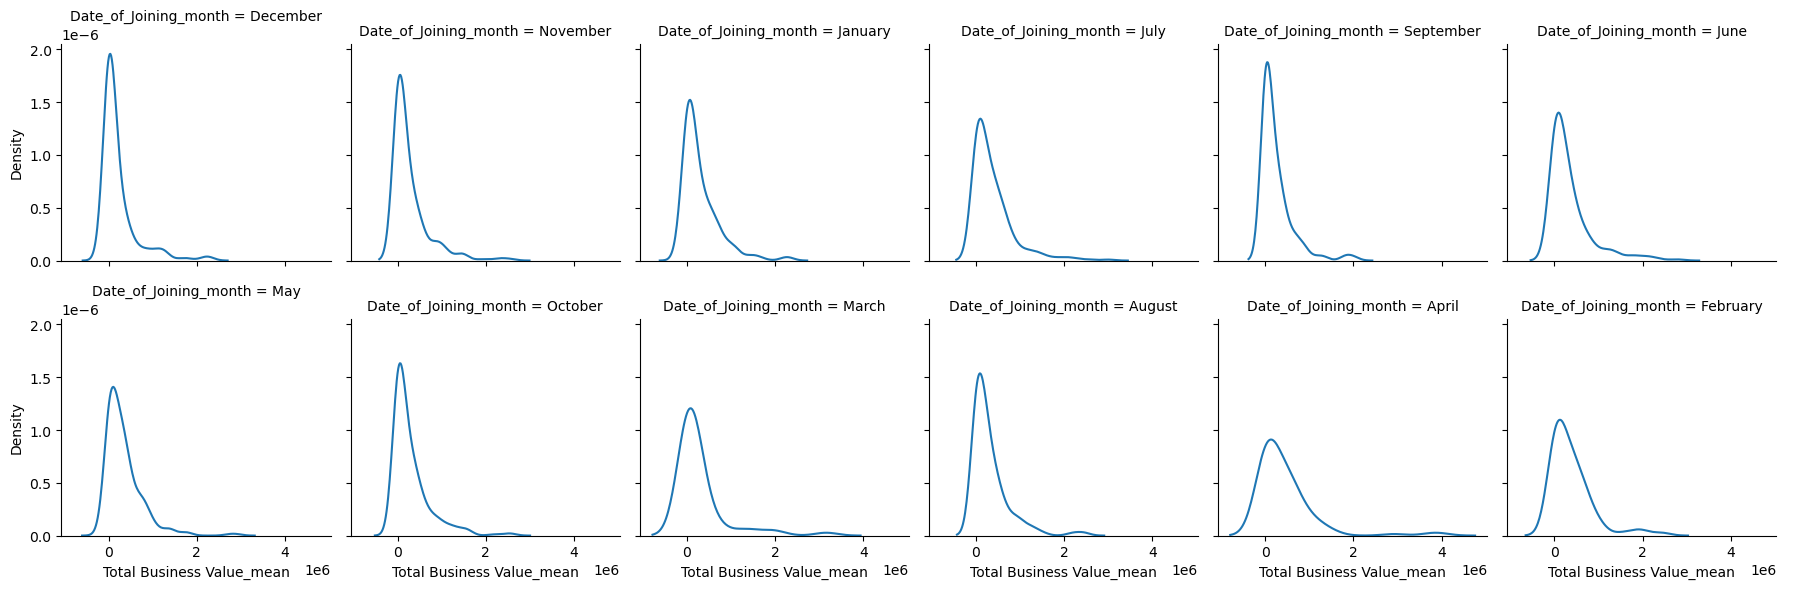

In [265]:
g=sns.FacetGrid(data=agg_df, col_wrap=6,col='Date_of_Joining_month',margin_titles=True)
g.map(sns.kdeplot,'Total Business Value_mean')
g.add_legend()

In [247]:
agg_df['Total Business Value_mean'].min()

-197932.85714285713

In [248]:
agg_df['Total Business Value_mean'].max()

3972127.5

No inference can be drawm on the basis of above plots

In [285]:
agg_df

,Driver_ID,MonthlyReportingDate_last,Age_first,Gender_first,City_first,City_last,Education_Level_count,Education_Level_first,Education_Level_last,Income_first,...,Total Business Value_mean,Total Business Value_median,Quarterly Rating_first,Quarterly Rating_last,Date_of_Joining_month,Target,Income_Increase,Rating_Increase,City_Change,Grade_inc_flag
0,1,03/01/19,28.0,0.0,C23,C23,3,2,2,57387,...,571860.000000,0.0,2,2,December,1,0,0,0,0
1,2,12/01/20,31.0,0.0,C7,C7,2,2,2,67016,...,0.000000,0.0,1,1,November,0,0,0,0,0
2,4,04/01/20,43.0,0.0,C13,C13,5,2,2,65603,...,70000.000000,0.0,1,1,December,1,0,0,0,0
3,5,03/01/19,29.0,0.0,C9,C9,3,0,0,46368,...,40120.000000,0.0,1,1,January,1,0,0,0,0
4,6,12/01/20,31.0,1.0,C11,C11,5,1,1,78728,...,253000.000000,0.0,1,2,July,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,12/01/20,33.0,0.0,C24,C24,24,0,0,82815,...,906200.833333,335690.0,3,4,October,0,0,1,0,0
2377,2785,10/01/20,34.0,1.0,C9,C9,3,0,0,12105,...,0.000000,0.0,1,1,August,1,0,0,0,0
2378,2786,09/01/19,44.0,0.0,C19,C19,9,0,0,35370,...,312787.777778,318460.0,2,1,July,1,0,0,0,0
2379,2787,06/01/19,28.0,1.0,C20,C20,6,2,2,69498,...,162971.666667,125000.0,2,1,July,1,0,0,0,0


### Outlier Detection 

In [316]:
agg_df

,Driver_ID,MonthlyReportingDate_last,Age_first,Gender_first,City_first,City_last,Education_Level_first,Education_Level_last,Income_first,Income_last,...,Grade_last,Total Business Value_mean,Total Business Value_median,Quarterly Rating_first,Quarterly Rating_last,Target,Income_Increase,Rating_Increase,City_Change,Grade_inc_flag
0,1,03/01/19,28.0,0.0,C23,C23,2,2,57387,57387,...,1,571860.000000,0.0,2,2,1,0,0,0,0
1,2,12/01/20,31.0,0.0,C7,C7,2,2,67016,67016,...,2,0.000000,0.0,1,1,0,0,0,0,0
2,4,04/01/20,43.0,0.0,C13,C13,2,2,65603,65603,...,2,70000.000000,0.0,1,1,1,0,0,0,0
3,5,03/01/19,29.0,0.0,C9,C9,0,0,46368,46368,...,1,40120.000000,0.0,1,1,1,0,0,0,0
4,6,12/01/20,31.0,1.0,C11,C11,1,1,78728,78728,...,3,253000.000000,0.0,1,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,12/01/20,33.0,0.0,C24,C24,0,0,82815,82815,...,3,906200.833333,335690.0,3,4,0,0,1,0,0
2377,2785,10/01/20,34.0,1.0,C9,C9,0,0,12105,12105,...,1,0.000000,0.0,1,1,1,0,0,0,0
2378,2786,09/01/19,44.0,0.0,C19,C19,0,0,35370,35370,...,2,312787.777778,318460.0,2,1,1,0,0,0,0
2379,2787,06/01/19,28.0,1.0,C20,C20,2,2,69498,69498,...,1,162971.666667,125000.0,2,1,1,0,0,0,0


<Axes: xlabel='Total Business Value_mean'>

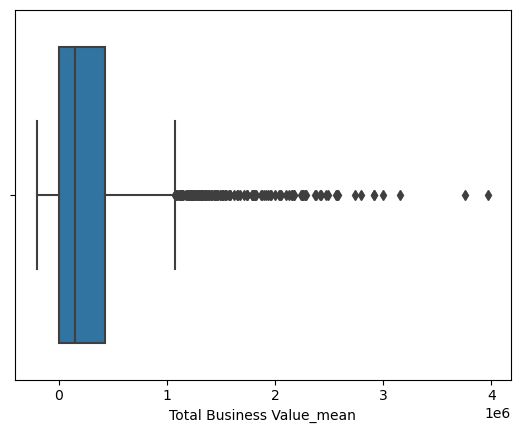

In [319]:
sns.boxplot(data=agg_df, x='Total Business Value_mean')

<Axes: xlabel='Income_first'>

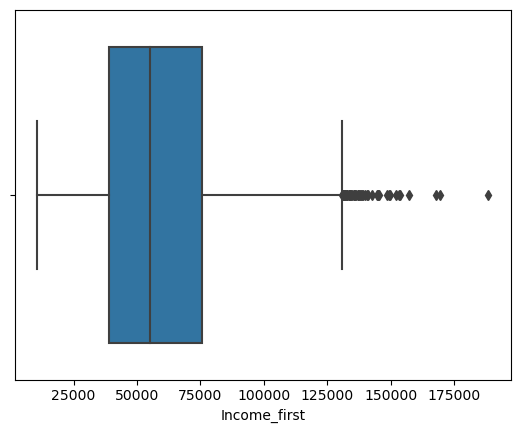

In [322]:
sns.boxplot(data=agg_df, x='Income_first')

<Axes: xlabel='Income_first', ylabel='Density'>

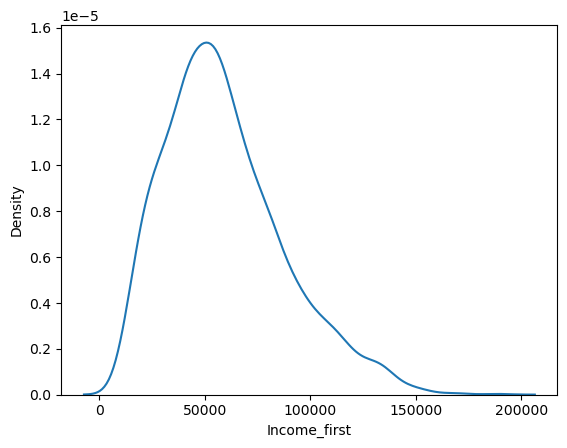

In [323]:
sns.kdeplot(agg_df['Income_first'])

Income and Total Business Value have outliers

In [329]:
pd.set_option('display.max_columns', None)

In [330]:
agg_df

,Driver_ID,MonthlyReportingDate_last,Age_first,Gender_first,City_first,City_last,Education_Level_first,Education_Level_last,Income_first,Income_last,Income_mean,Dateofjoining_first,LastWorkingDate_last,Joining Designation_first,Grade_first,Grade_last,Total Business Value_mean,Total Business Value_median,Quarterly Rating_first,Quarterly Rating_last,Target,Income_Increase,Rating_Increase,City_Change,Grade_inc_flag
0,1,03/01/19,28.0,0.0,C23,C23,2,2,57387,57387,57387.0,2018-12-24,2019-03-11,1,1,1,571860.000000,0.0,2,2,1,0,0,0,0
1,2,12/01/20,31.0,0.0,C7,C7,2,2,67016,67016,67016.0,2020-11-06,NaT,2,2,2,0.000000,0.0,1,1,0,0,0,0,0
2,4,04/01/20,43.0,0.0,C13,C13,2,2,65603,65603,65603.0,2019-12-07,2020-04-27,2,2,2,70000.000000,0.0,1,1,1,0,0,0,0
3,5,03/01/19,29.0,0.0,C9,C9,0,0,46368,46368,46368.0,2019-01-09,2019-03-07,1,1,1,40120.000000,0.0,1,1,1,0,0,0,0
4,6,12/01/20,31.0,1.0,C11,C11,1,1,78728,78728,78728.0,2020-07-31,NaT,3,3,3,253000.000000,0.0,1,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,12/01/20,33.0,0.0,C24,C24,0,0,82815,82815,82815.0,2015-10-15,NaT,2,3,3,906200.833333,335690.0,3,4,0,0,1,0,0
2377,2785,10/01/20,34.0,1.0,C9,C9,0,0,12105,12105,12105.0,2020-08-28,2020-10-28,1,1,1,0.000000,0.0,1,1,1,0,0,0,0
2378,2786,09/01/19,44.0,0.0,C19,C19,0,0,35370,35370,35370.0,2018-07-31,2019-09-22,2,2,2,312787.777778,318460.0,2,1,1,0,0,0,0
2379,2787,06/01/19,28.0,1.0,C20,C20,2,2,69498,69498,69498.0,2018-07-21,2019-06-20,1,1,1,162971.666667,125000.0,2,1,1,0,0,0,0


<Axes: xlabel='Joining Designation_first'>

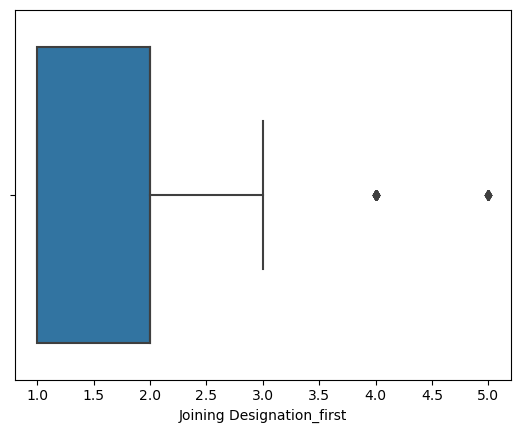

In [331]:
sns.boxplot(data=agg_df, x='Joining Designation_first')

<Axes: xlabel='Income_mean'>

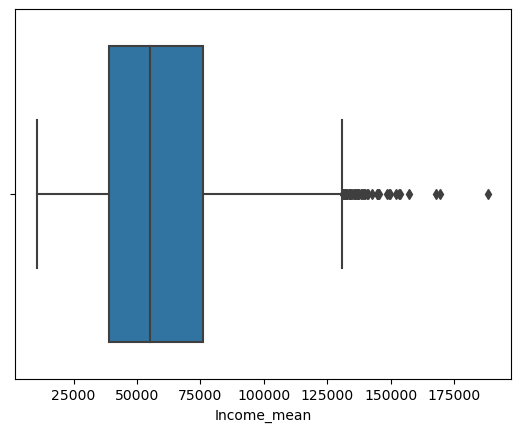

In [419]:
sns.boxplot(data=agg_df, x='Income_mean')

### Outlier Count and Treatment via IQR Method

In [661]:
numerical_data = agg_df.select_dtypes(include='number')
num_cols = numerical_data.columns
len(num_cols)
numerical_data

,Driver_ID,Age_first,Gender_first,Education_Level_first,Education_Level_last,Income_first,Income_last,Income_mean,Joining Designation_last,Grade_first,Grade_last,Total Business Value_mean,Total Business Value_median,Quarterly Rating_first,Quarterly Rating_last,Target,Income_Increase,Rating_Increase,City_Change,Grade_inc_flag
0,1,28.0,0.0,2,2,57387,57387,57387.0,1,1,1,571860.000000,0.0,2,2,1,0,0,0,0
1,2,31.0,0.0,2,2,67016,67016,67016.0,2,2,2,0.000000,0.0,1,1,0,0,0,0,0
2,4,43.0,0.0,2,2,65603,65603,65603.0,2,2,2,70000.000000,0.0,1,1,1,0,0,0,0
3,5,29.0,0.0,0,0,46368,46368,46368.0,1,1,1,40120.000000,0.0,1,1,1,0,0,0,0
4,6,31.0,1.0,1,1,78728,78728,78728.0,3,3,3,253000.000000,0.0,1,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,33.0,0.0,0,0,82815,82815,82815.0,2,3,3,906200.833333,335690.0,3,4,0,0,1,0,0
2377,2785,34.0,1.0,0,0,12105,12105,12105.0,1,1,1,0.000000,0.0,1,1,1,0,0,0,0
2378,2786,44.0,0.0,0,0,35370,35370,35370.0,2,2,2,312787.777778,318460.0,2,1,1,0,0,0,0
2379,2787,28.0,1.0,2,2,69498,69498,69498.0,1,1,1,162971.666667,125000.0,2,1,1,0,0,0,0


<Axes: xlabel='Feature'>

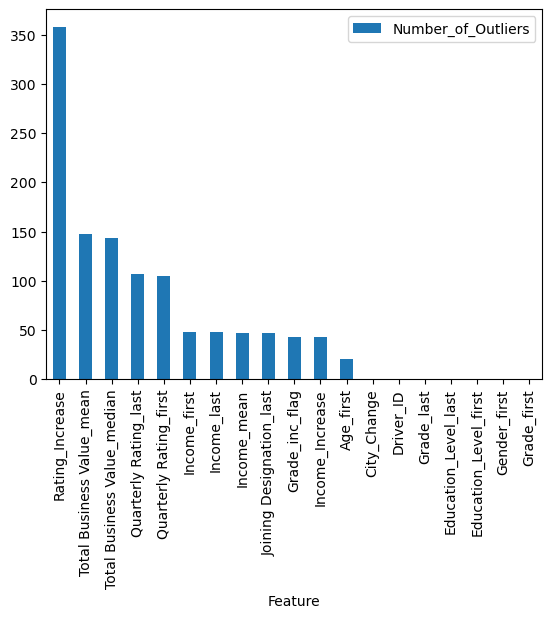

In [664]:
def outliers_count_via_iqr_method(dataframe,target_column):
    mask=dataframe.columns!=target_column
    columns_excluding_target_variable=dataframe.columns[mask].tolist()
    numeric_only_df_columns=dataframe[columns_excluding_target_variable].select_dtypes(include='number').columns
    outlier_count_df=pd.DataFrame(columns=['Feature','Number_of_Outliers'])
    for i in range(len(numeric_only_df_columns)):
        q3=dataframe[numeric_only_df_columns[i]].quantile(q=0.75)
        q1=dataframe[numeric_only_df_columns[i]].quantile(q=0.25)
        iqr=q3-q1
        lower_range=q1-(1.5)*iqr
        upper_range=q3+(1.5)*iqr
        count=(dataframe[numeric_only_df_columns[i]].apply(lambda x: True if x<lower_range or x>upper_range else False)).sum()
        outlier_count_df.loc[i]=numeric_only_df_columns[i],count
    return outlier_count_df.sort_values(by='Number_of_Outliers',ascending=False).set_index('Feature').plot.bar()
outliers_count_via_iqr_method(agg_df,'Target')

In [708]:
def outliers_treatment_via_iqr_method(dataframe,target_column):
    mask=dataframe.columns!=target_column
    columns_excluding_target_variable=dataframe.columns[mask].tolist()
    numeric_only_df_columns=dataframe[columns_excluding_target_variable].select_dtypes(include='number').columns
    for i in range(len(numeric_only_df_columns)):
        q3=dataframe[numeric_only_df_columns[i]].quantile(q=0.75)
        q1=dataframe[numeric_only_df_columns[i]].quantile(q=0.25)
        iqr=q3-q1
        lower_range=q1-(1.5)*iqr
        upper_range=q3+(1.5)*iqr
        dataframe[numeric_only_df_columns[i]]=\
        dataframe[numeric_only_df_columns[i]].\
        apply(lambda x: x if lower_range <= x <= upper_range else (lower_range if x < lower_range else upper_range))
    return dataframe
outlier_treated_df=outliers_treatment_via_iqr_method(agg_df,'Target')

<Axes: xlabel='Income_mean'>

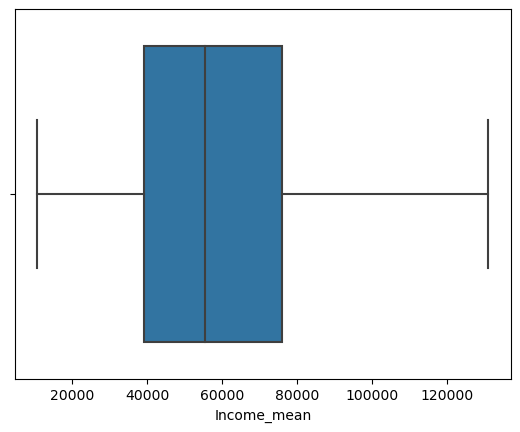

In [709]:
sns.boxplot(data=outlier_treated_df, x='Income_mean')

In [711]:
agg_df

,Driver_ID,MonthlyReportingDate_last,Age_first,Gender_first,City_first,City_last,Education_Level_first,Education_Level_last,Income_first,Income_last,Income_mean,Dateofjoining_first,LastWorkingDate_last,Joining Designation_last,Grade_first,Grade_last,Total Business Value_mean,Total Business Value_median,Quarterly Rating_first,Quarterly Rating_last,Target,Income_Increase,Rating_Increase,City_Change,Grade_inc_flag,Edu_level_diff
0,1,03/01/19,28.0,0.0,C23,C23,2,2,57387.0,57387.0,57387.0,2018-12-24,2019-03-11,1.0,1,1,571860.000000,0.0,2.0,2.0,1,0.0,0.0,0,0.0,0
1,2,12/01/20,31.0,0.0,C7,C7,2,2,67016.0,67016.0,67016.0,2020-11-06,NaT,2.0,2,2,0.000000,0.0,1.0,1.0,0,0.0,0.0,0,0.0,0
2,4,04/01/20,43.0,0.0,C13,C13,2,2,65603.0,65603.0,65603.0,2019-12-07,2020-04-27,2.0,2,2,70000.000000,0.0,1.0,1.0,1,0.0,0.0,0,0.0,0
3,5,03/01/19,29.0,0.0,C9,C9,0,0,46368.0,46368.0,46368.0,2019-01-09,2019-03-07,1.0,1,1,40120.000000,0.0,1.0,1.0,1,0.0,0.0,0,0.0,0
4,6,12/01/20,31.0,1.0,C11,C11,1,1,78728.0,78728.0,78728.0,2020-07-31,NaT,3.0,3,3,253000.000000,0.0,1.0,2.0,0,0.0,0.0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,12/01/20,33.0,0.0,C24,C24,0,0,82815.0,82815.0,82815.0,2015-10-15,NaT,2.0,3,3,906200.833333,335690.0,3.0,3.5,0,0.0,0.0,0,0.0,0
2377,2785,10/01/20,34.0,1.0,C9,C9,0,0,12105.0,12105.0,12105.0,2020-08-28,2020-10-28,1.0,1,1,0.000000,0.0,1.0,1.0,1,0.0,0.0,0,0.0,0
2378,2786,09/01/19,44.0,0.0,C19,C19,0,0,35370.0,35370.0,35370.0,2018-07-31,2019-09-22,2.0,2,2,312787.777778,318460.0,2.0,1.0,1,0.0,0.0,0,0.0,0
2379,2787,06/01/19,28.0,1.0,C20,C20,2,2,69498.0,69498.0,69498.0,2018-07-21,2019-06-20,1.0,1,1,162971.666667,125000.0,2.0,1.0,1,0.0,0.0,0,0.0,0


<Axes: xlabel='Joining Designation_last'>

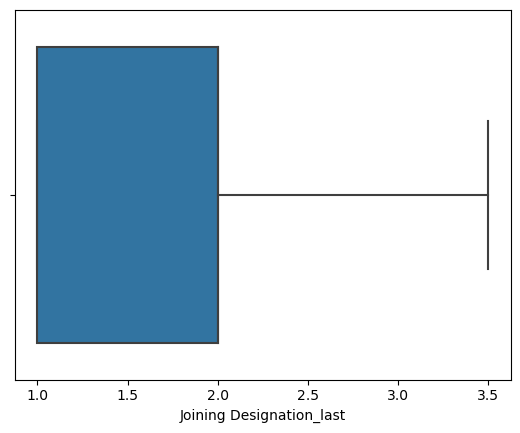

In [712]:
sns.boxplot(data=outlier_treated_df, x='Joining Designation_last')

<Axes: xlabel='Age_first'>

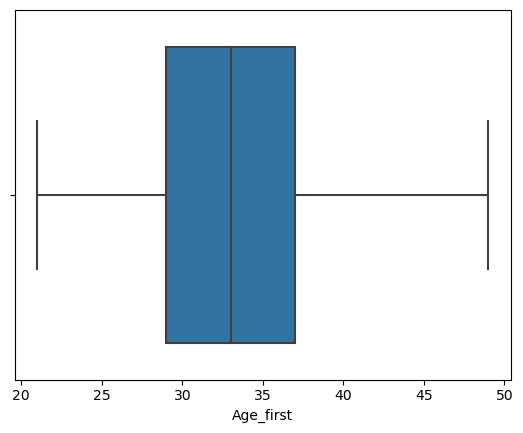

In [713]:
sns.boxplot(data=outlier_treated_df, x='Age_first')

In [370]:
agg_df

,Driver_ID,MonthlyReportingDate_last,Age_first,Gender_first,City_first,City_last,Education_Level_first,Education_Level_last,Income_first,Income_last,Income_mean,Dateofjoining_first,LastWorkingDate_last,Joining Designation_last,Grade_first,Grade_last,Total Business Value_mean,Total Business Value_median,Quarterly Rating_first,Quarterly Rating_last,Target,Income_Increase,Rating_Increase,City_Change,Grade_inc_flag
0,1,03/01/19,28.0,0.0,C23,C23,2,2,57387,57387,57387.0,2018-12-24,2019-03-11,1,1,1,571860.000000,0.0,2,2,1,0,0,0,0
1,2,12/01/20,31.0,0.0,C7,C7,2,2,67016,67016,67016.0,2020-11-06,NaT,2,2,2,0.000000,0.0,1,1,0,0,0,0,0
2,4,04/01/20,43.0,0.0,C13,C13,2,2,65603,65603,65603.0,2019-12-07,2020-04-27,2,2,2,70000.000000,0.0,1,1,1,0,0,0,0
3,5,03/01/19,29.0,0.0,C9,C9,0,0,46368,46368,46368.0,2019-01-09,2019-03-07,1,1,1,40120.000000,0.0,1,1,1,0,0,0,0
4,6,12/01/20,31.0,1.0,C11,C11,1,1,78728,78728,78728.0,2020-07-31,NaT,3,3,3,253000.000000,0.0,1,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,12/01/20,33.0,0.0,C24,C24,0,0,82815,82815,82815.0,2015-10-15,NaT,2,3,3,906200.833333,335690.0,3,4,0,0,1,0,0
2377,2785,10/01/20,34.0,1.0,C9,C9,0,0,12105,12105,12105.0,2020-08-28,2020-10-28,1,1,1,0.000000,0.0,1,1,1,0,0,0,0
2378,2786,09/01/19,44.0,0.0,C19,C19,0,0,35370,35370,35370.0,2018-07-31,2019-09-22,2,2,2,312787.777778,318460.0,2,1,1,0,0,0,0
2379,2787,06/01/19,28.0,1.0,C20,C20,2,2,69498,69498,69498.0,2018-07-21,2019-06-20,1,1,1,162971.666667,125000.0,2,1,1,0,0,0,0


In [477]:
agg_df_prepr=agg_df.copy()

In [478]:
agg_df_prepr.drop(['Driver_ID','MonthlyReportingDate_last','City_last','Education_Level_last','Income_first',\
            'Income_last','Dateofjoining_first','LastWorkingDate_last','Grade_first',\
             'Total Business Value_median','Quarterly Rating_first','Quarterly Rating_last','City_Change'], inplace=True,axis=1)

In [479]:
agg_df_prepr.rename(columns={'Age_first':'Age','Gender_first':'Gender','City_first':'City',\
                            'Education_level_first':'Education_Level','Joining Designation_last':'Joining Designation'},
                    inplace=True)

In [480]:
agg_df_prepr

,Age,Gender,City,Education_Level_first,Income_mean,Joining Designation,Grade_last,Total Business Value_mean,Target,Income_Increase,Rating_Increase,Grade_inc_flag
0,28.0,0.0,C23,2,57387.0,1,1,571860.000000,1,0,0,0
1,31.0,0.0,C7,2,67016.0,2,2,0.000000,0,0,0,0
2,43.0,0.0,C13,2,65603.0,2,2,70000.000000,1,0,0,0
3,29.0,0.0,C9,0,46368.0,1,1,40120.000000,1,0,0,0
4,31.0,1.0,C11,1,78728.0,3,3,253000.000000,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2376,33.0,0.0,C24,0,82815.0,2,3,906200.833333,0,0,1,0
2377,34.0,1.0,C9,0,12105.0,1,1,0.000000,1,0,0,0
2378,44.0,0.0,C19,0,35370.0,2,2,312787.777778,1,0,0,0
2379,28.0,1.0,C20,2,69498.0,1,1,162971.666667,1,0,0,0


In [481]:
agg_df_prepr.describe()

,Age,Gender,Education_Level_first,Income_mean,Joining Designation,Grade_last,Total Business Value_mean,Target,Income_Increase,Rating_Increase,Grade_inc_flag
count,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000
mean,33.090718,0.410332,1.00756,59232.460484,1.820244,2.096598,3.120854e+05,0.678706,0.018060,0.150357,0.018060
std,5.840686,0.491997,0.81629,28298.214012,0.841433,0.941522,4.495705e+05,0.467071,0.133195,0.357496,0.133195
min,21.000000,0.000000,0.00000,10747.000000,1.000000,1.000000,-1.979329e+05,0.000000,0.000000,0.000000,0.000000
25%,29.000000,0.000000,0.00000,39104.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,33.000000,0.000000,1.00000,55285.000000,2.000000,2.000000,1.506244e+05,1.000000,0.000000,0.000000,0.000000
75%,37.000000,1.000000,2.00000,75835.000000,2.000000,3.000000,4.294988e+05,1.000000,0.000000,0.000000,0.000000
max,58.000000,1.000000,2.00000,188418.000000,5.000000,5.000000,3.972128e+06,1.000000,1.000000,1.000000,1.000000


### KNN Imputation Note

KNN Imputation is not done because the data is aggregated and has no null values. 
The variable LastWorkingDate had around 700+ null but has been dropped in the final set of variables used for model building

### Checking Correlations among independent Variables

In [482]:
agg_df_prepr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        2381 non-null   float64
 1   Gender                     2381 non-null   float64
 2   City                       2381 non-null   object 
 3   Education_Level_first      2381 non-null   int64  
 4   Income_mean                2381 non-null   float64
 5   Joining Designation        2381 non-null   int64  
 6   Grade_last                 2381 non-null   int64  
 7   Total Business Value_mean  2381 non-null   float64
 8   Target                     2381 non-null   int64  
 9   Income_Increase            2381 non-null   int64  
 10  Rating_Increase            2381 non-null   int64  
 11  Grade_inc_flag             2381 non-null   int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 223.3+ KB


In [483]:
numerical_columns=agg_df_prepr.select_dtypes(exclude='object').columns

In [484]:
mask=numerical_columns!='Target'

In [485]:
numerical_columns_excluding_target=numerical_columns[mask].tolist()

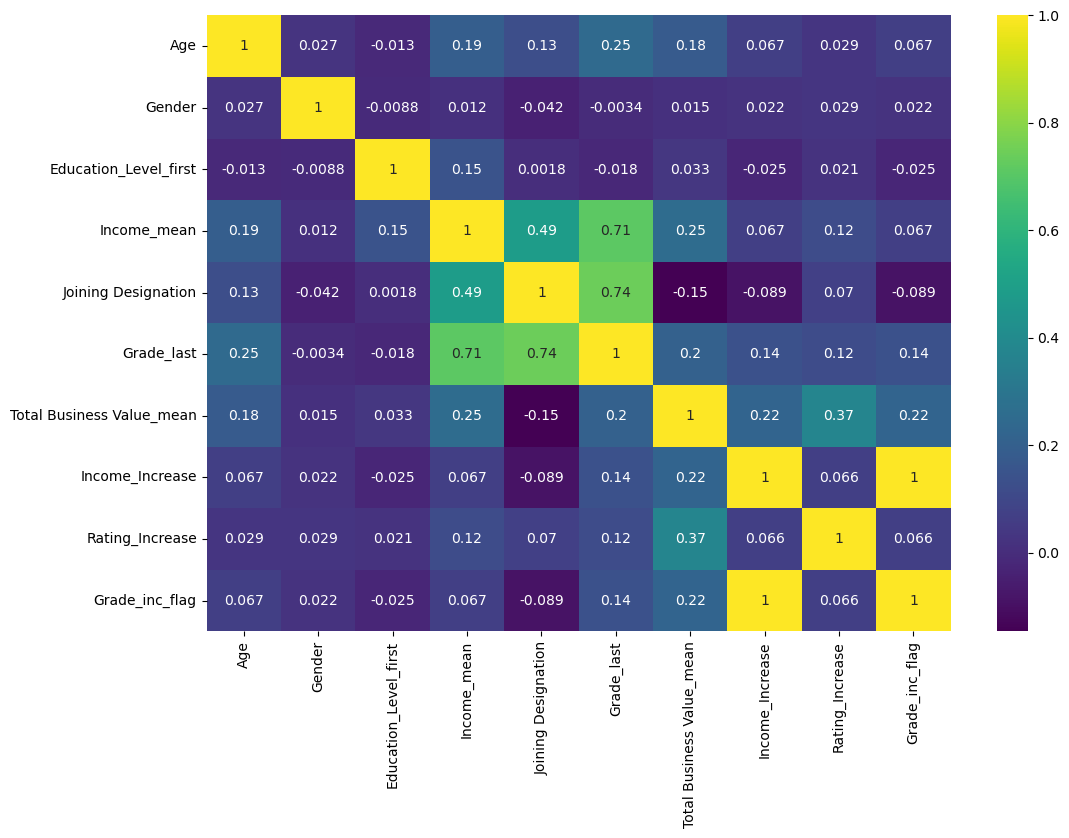

In [486]:
plt.figure(figsize=(12, 8))
sns.heatmap(agg_df_prepr[numerical_columns_excluding_target].corr(method='spearman'), annot=True, cmap='viridis')
plt.show()

Since Grade_Incease_flag and Income Increase ar highly correlated we need to drop either one of them

In [487]:
agg_df_prepr.drop(['Grade_inc_flag'],axis=1,inplace=True)

In [488]:
numerical_columns=agg_df_prepr.select_dtypes(exclude='object').columns
mask=numerical_columns!='Target'
numerical_columns_excluding_target=numerical_columns[mask].tolist()

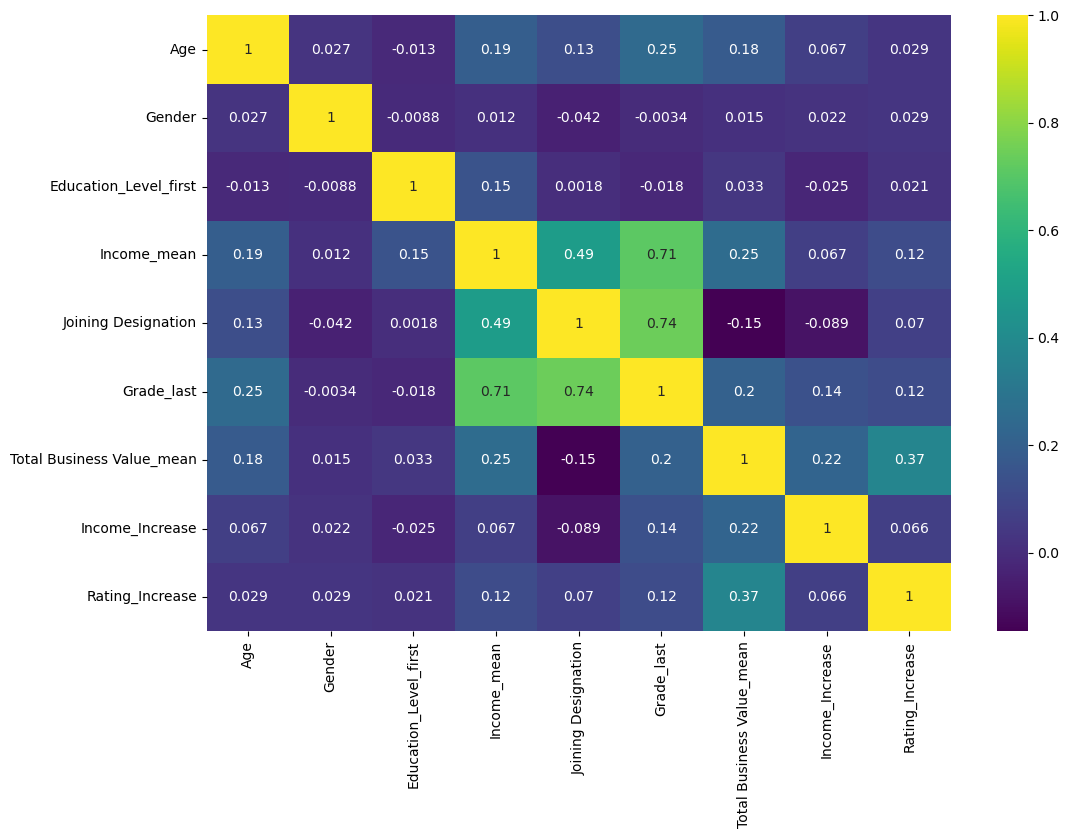

In [489]:
plt.figure(figsize=(12, 8))
sns.heatmap(agg_df_prepr[numerical_columns_excluding_target].corr(method='spearman'), annot=True, cmap='viridis')
plt.show()

In [490]:
agg_df_prepr.drop(['Grade_last'],axis=1,inplace=True)

In [491]:
agg_df_prepr

,Age,Gender,City,Education_Level_first,Income_mean,Joining Designation,Total Business Value_mean,Target,Income_Increase,Rating_Increase
0,28.0,0.0,C23,2,57387.0,1,571860.000000,1,0,0
1,31.0,0.0,C7,2,67016.0,2,0.000000,0,0,0
2,43.0,0.0,C13,2,65603.0,2,70000.000000,1,0,0
3,29.0,0.0,C9,0,46368.0,1,40120.000000,1,0,0
4,31.0,1.0,C11,1,78728.0,3,253000.000000,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2376,33.0,0.0,C24,0,82815.0,2,906200.833333,0,0,1
2377,34.0,1.0,C9,0,12105.0,1,0.000000,1,0,0
2378,44.0,0.0,C19,0,35370.0,2,312787.777778,1,0,0
2379,28.0,1.0,C20,2,69498.0,1,162971.666667,1,0,0


In [494]:
numerical_columns=agg_df_prepr.select_dtypes(exclude='object').columns
mask=numerical_columns!='Target'
numerical_columns_excluding_target=numerical_columns[mask].tolist()

In [495]:
numerical_columns_excluding_target

['Age',
 'Gender',
 'Education_Level_first',
 'Income_mean',
 'Joining Designation',
 'Total Business Value_mean',
 'Income_Increase',
 'Rating_Increase']

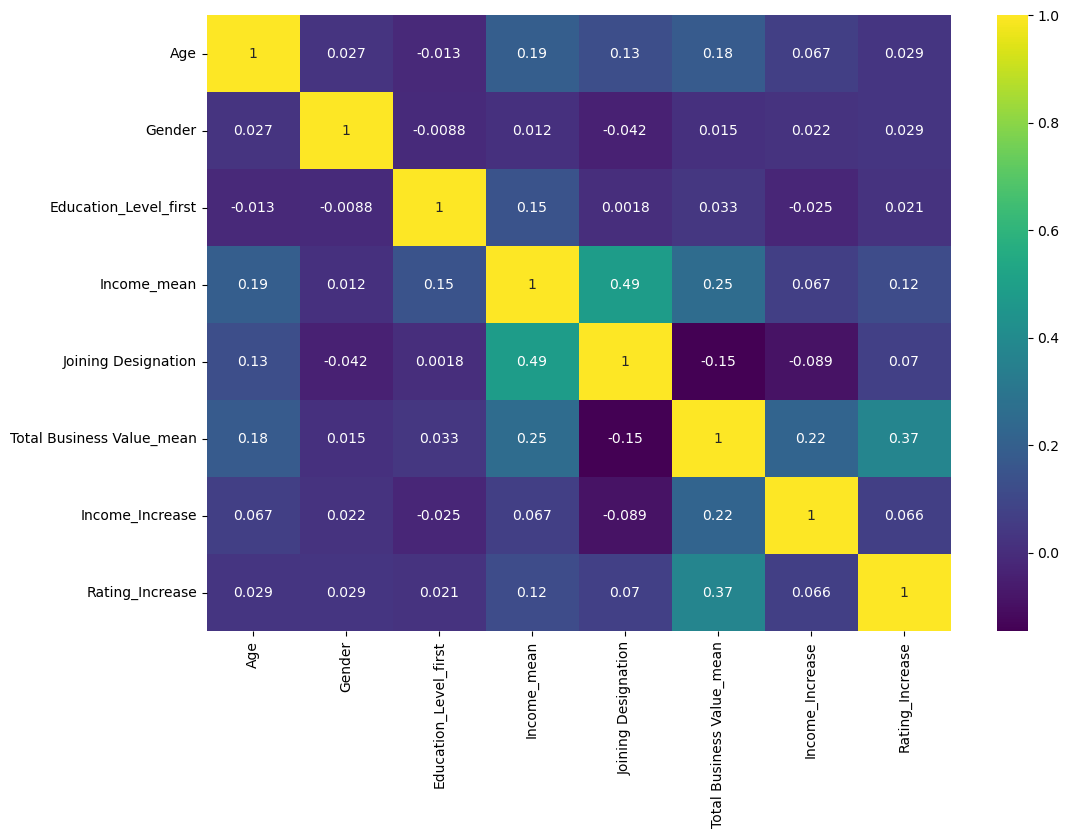

In [496]:
plt.figure(figsize=(12, 8))
sns.heatmap(agg_df_prepr[numerical_columns_excluding_target].corr(method='spearman'), annot=True, cmap='viridis')
plt.show()

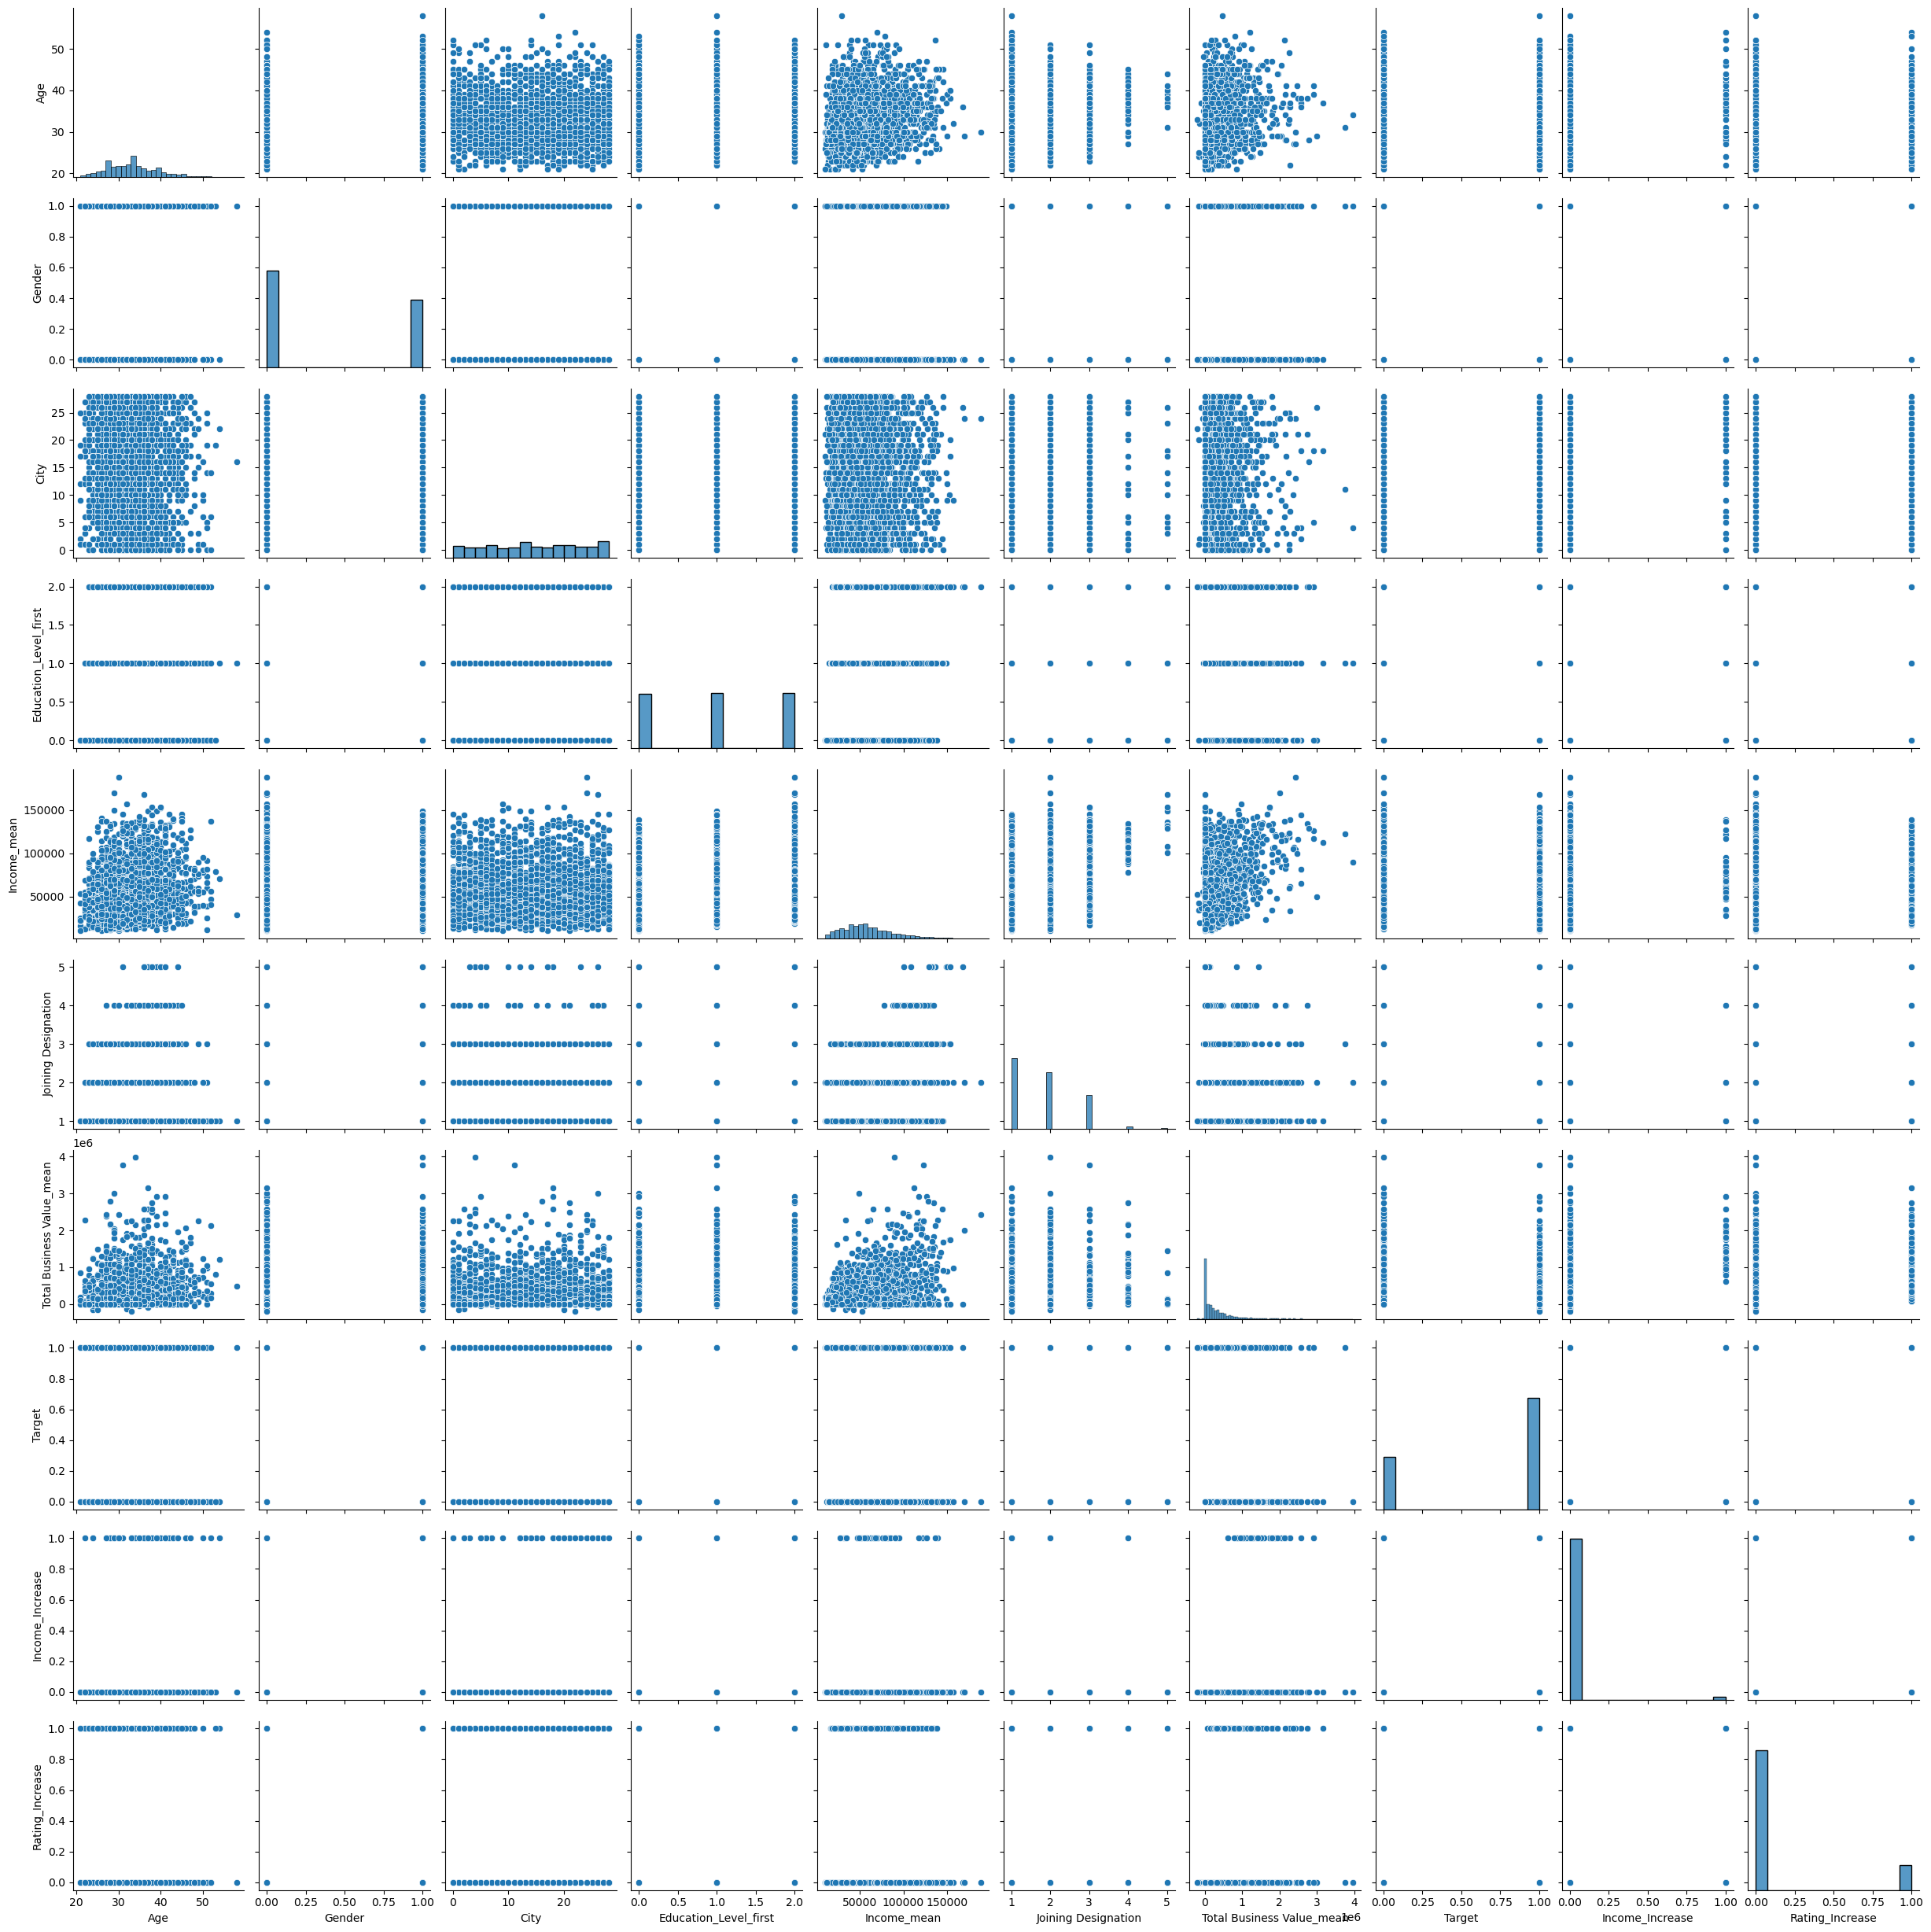

In [586]:
sns.pairplot(agg_df_prepr)

### Encoding of Categorical Variables

In [497]:
label_encoder = LabelEncoder()
agg_df_prepr['City']=label_encoder.fit_transform(agg_df_prepr['City'])

In [498]:
agg_df_prepr.isna().sum()

Age                          0
Gender                       0
City                         0
Education_Level_first        0
Income_mean                  0
Joining Designation          0
Total Business Value_mean    0
Target                       0
Income_Increase              0
Rating_Increase              0
dtype: int64

### Data Preparation for Modeling -

In [499]:
X = agg_df_prepr.drop('Target', axis=1)
y = agg_df_prepr['Target']

In [500]:
X.shape

(2381, 9)

In [501]:
y.shape

(2381,)

In [502]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,
                                                    stratify=y, random_state=42)

In [503]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1666, 9)
(715, 9)
(1666,)
(715,)


### Oversampling using SMOTE

In [504]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [505]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (2262, 9)
After OverSampling, the shape of train_y: (2262,) 

After OverSampling, counts of label '1': 1131
After OverSampling, counts of label '0': 1131


### Standardization of Training Data

In [506]:
scaler = MinMaxScaler()
X_train_res = scaler.fit_transform(X_train_res)

In [507]:
X_test = scaler.transform(X_test)

## Random Forest Classifier with hyperparameter tuning and KFold

In [508]:
rfc=RandomForestClassifier(random_state=42, n_estimators=300, max_depth=6)
kfold = KFold(n_splits=10)
cv_acc_results = cross_validate(rfc, X_train_res, y_train_res, cv = kfold, scoring = 'accuracy' ,return_train_score = True)

print(f"K-Fold Accuracy Mean: Train:\
{cv_acc_results['train_score'].mean().round(3)*100} Validation: {cv_acc_results['test_score'].mean().round(3)*100}")

K-Fold Accuracy Mean: Train:80.2 Validation: 75.2


In [509]:
rfc = RandomForestClassifier(random_state=7, n_estimators=300, max_depth=6, oob_score=True)
rfc.fit(X_train_res, y_train_res)
rfc.oob_score_

0.762157382847038

In [510]:
rfc.estimators_[:4]

[DecisionTreeClassifier(max_depth=6, max_features='sqrt', random_state=327741615),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt', random_state=976413892),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt',
                        random_state=1202242073),
 DecisionTreeClassifier(max_depth=6, max_features='sqrt',
                        random_state=1369975286)]

#### Using RandomizedSearchCV

In [621]:
%%time
params2explore = {"n_estimators":[210], #10
                  "max_depth":[2,3,4,5,6,7,8,9,10,11,12,13,14,15], # 14
                  'ccp_alpha': np.linspace(0,0.01,50),
                  'min_samples_leaf': [5,10,15],
                  'min_samples_split': [5,10,15],
                  'max_samples':[1.0],
                  'max_leaf_nodes':[10,20],
                  'min_impurity_decrease':[0.0,0.1],
                  'max_samples':[0.5,0.75,1],
                  'max_features':['sqrt','log2'],
                  'criterion':['gini', 'entropy', 'log_loss']
                  }
random = RandomizedSearchCV(estimator = RandomForestClassifier(random_state=7, bootstrap=True),
                            param_distributions = params2explore,
                            scoring = 'accuracy',
                            cv = 3,
                            n_iter=15,
                            n_jobs=-1
                            )
random.fit(X_train_res, y_train_res)

CPU times: total: 594 ms
Wall time: 4.71 s


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=7),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'ccp_alpha': array([0.        , 0.00020408, 0.00040816, 0.00061224, 0.00081633,
       0.00102041, 0.00122449, 0.00142857, 0.00163265, 0.00183673,
       0.00204082, 0.0022449 , 0.00244898, 0.00265306, 0.00285714,
       0.00306122, 0.00326531, 0.00346939, 0.00367347, 0.00387755,
       0.0040...
       0.00918367, 0.00938776, 0.00959184, 0.00979592, 0.01      ]),
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_leaf_nodes': [10, 20],
                                        'max_samples': [0.5, 0.75, 1],
                                        'min_impurity_decrease': [0.0, 0.1],
                                        'min_samples_leaf': [5, 10, 15],
                                        'min_samples_split': [5, 10, 15],
                                        'n_estimators': [210]},
                   scoring='accuracy')

In [622]:
print("Best param: ", random.best_params_)
print("Best score: ", random.best_score_)

Best param:  {'n_estimators': 210, 'min_samples_split': 5, 'min_samples_leaf': 5, 'min_impurity_decrease': 0.0, 'max_samples': 0.75, 'max_leaf_nodes': 20, 'max_features': 'sqrt', 'max_depth': 7, 'criterion': 'gini', 'ccp_alpha': 0.005510204081632653}
Best score:  0.7413793103448275


#### Using GridSearchCV

In [518]:
params2explore = {"n_estimators":[100,200,300,400], #4
                  "max_depth":[3,5,7,8,10] # 5
                  }
rfc = RandomForestClassifier()
model = GridSearchCV(rfc, params2explore,scoring="accuracy",n_jobs=-1, cv=3, return_train_score=True,verbose=True)

In [519]:
model.fit(X_train_res, y_train_res)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 8, 10],
                         'n_estimators': [100, 200, 300, 400]},
             return_train_score=True, scoring='accuracy', verbose=True)

In [520]:
print(model.cv_results_['mean_train_score'])

[0.74160035 0.74248453 0.74314766 0.74712644 0.78934571 0.78536693
 0.78448276 0.78669319 0.83554377 0.83510168 0.83377542 0.83465959
 0.86671088 0.87046861 0.86472149 0.86671088 0.93899204 0.938771
 0.938771   0.93921309]


In [521]:
model.best_score_

0.7714412024756853

In [522]:
model.best_params_

{'max_depth': 10, 'n_estimators': 400}

In [523]:
grid_predictions=model.predict(X_test)
print(grid_predictions)

[0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1
 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 0
 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 0 1 1
 0 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1
 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0
 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1
 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0
 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 0 0
 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 0
 1 1 1 1 0 1 1 1 0 0 1 1 

### Classification Report for Random Forest Bagging

In [524]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.64      0.55      0.59       230
           1       0.80      0.86      0.83       485

    accuracy                           0.76       715
   macro avg       0.72      0.70      0.71       715
weighted avg       0.75      0.76      0.75       715



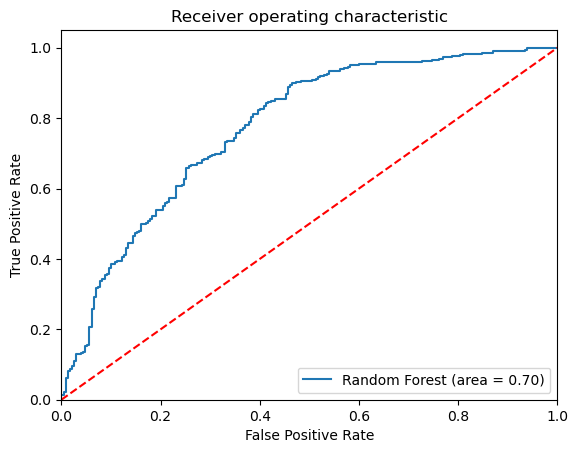

In [525]:
rfc_roc_auc = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RandomForest_ROC')
plt.show()

The area under the curve is 70 signifying that model is able to classify 70% of the datapoints correctly

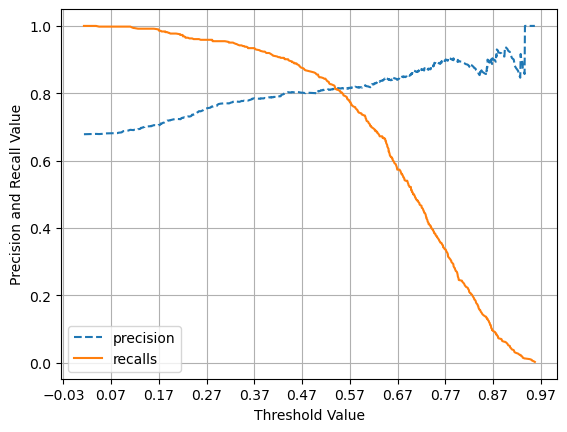

In [527]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, model.predict_proba(X_test)[:,1])

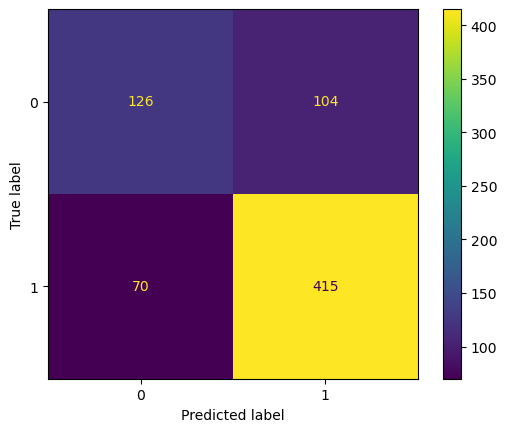

In [528]:
cm = confusion_matrix(y_test,grid_predictions)
ConfusionMatrixDisplay(cm).plot()
plt.show()

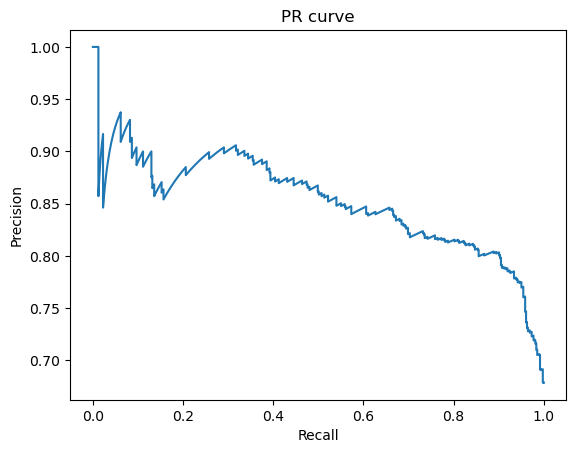

In [529]:
prob = model.predict_proba(X_test)
prob_1 = prob[:,1]
precision, recall, thr = precision_recall_curve(y_test, prob_1)
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [530]:
print(f'The aread under the P-R curve is {auc(recall, precision):.3f}')

The aread under the P-R curve is 0.852


### Feature Importance in Random Forest Classifier

In [534]:
rfc_tuned=RandomForestClassifier(random_state=7, max_depth=10, n_estimators=400,oob_score=True)

In [535]:
rfc_tuned.fit(X_train_res, y_train_res)

RandomForestClassifier(max_depth=10, n_estimators=400, oob_score=True,
                       random_state=7)

In [536]:
rfc_tuned.oob_score_

0.773209549071618

In [537]:
importances = rfc_tuned.feature_importances_
importances     

array([0.12969179, 0.15276387, 0.09279442, 0.03937761, 0.17041554,
       0.05074249, 0.25409679, 0.00309471, 0.10702278])

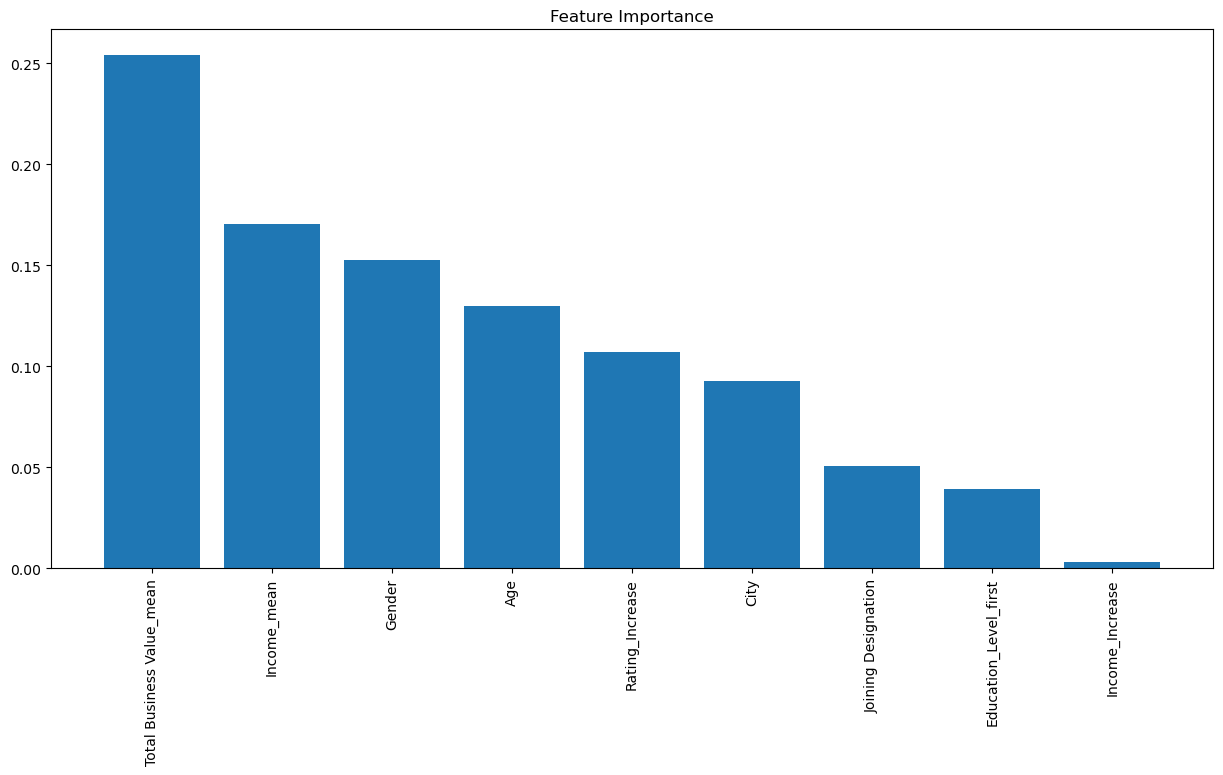

In [541]:
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot    

In [562]:
indices

array([6, 4, 1, 0, 8, 2, 5, 3, 7], dtype=int64)

## Gradient Boosting Classifier with hyperparameter tuning 

In [542]:
gbc = GradientBoostingClassifier(n_estimators=150, max_depth=2, loss = 'log_loss')
gbc.fit(X_train_res, y_train_res)

GradientBoostingClassifier(max_depth=2, n_estimators=150)

In [543]:
gbc.score(X_test, y_test)

0.7678321678321678

In [544]:
gbc.feature_importances_

array([0.08979814, 0.28705004, 0.02098904, 0.01405356, 0.05543433,
       0.04973622, 0.30977856, 0.00078817, 0.17237194])

## Gradient Boosting Classifier with hyperparameter tuning using RandomizedSearchCV

In [559]:
params = {
    "n_estimators": [50,100,150,200],
    "max_depth" : [2,3,5],
    "learning_rate": [0.001,0.005,0.01],
    'subsample':[0.3,0.4,0.5,0.6,0.7,0.9],
    'min_samples_leaf':[10,20,30,40],
    
}

In [560]:
%%time

gbc = GradientBoostingClassifier()
gbc_clf = RandomizedSearchCV(gbc, params, scoring = "accuracy", cv=3, n_jobs = -1, verbose = 10)

gbc_clf.fit(X_train_res, y_train_res)

print(gbc_clf.best_params_)
gbc_clf.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'subsample': 0.9, 'n_estimators': 150, 'min_samples_leaf': 10, 'max_depth': 5, 'learning_rate': 0.01}
CPU times: total: 891 ms
Wall time: 6.76 s


GradientBoostingClassifier(learning_rate=0.01, max_depth=5, min_samples_leaf=10,
                           n_estimators=150, subsample=0.9)

In [561]:
print('Train', gbc_clf.score(X_train_res, y_train_res))
print('Test', gbc_clf.score(X_test, y_test))

Train 0.7900088417329797
Test 0.7664335664335664


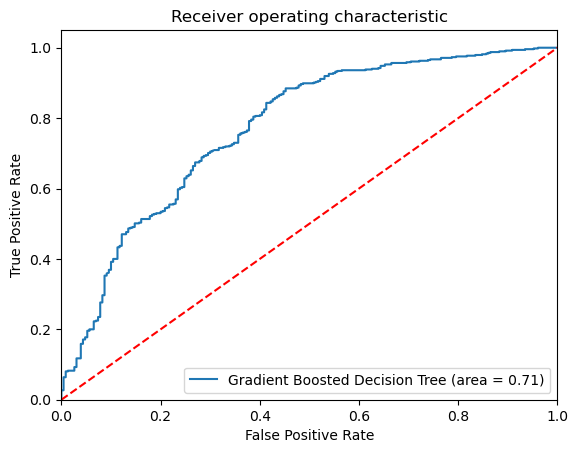

In [563]:
rfc_roc_auc = roc_auc_score(y_test, gbc_clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, gbc_clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosted Decision Tree (area = %0.2f)' % rfc_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('GBDT_ROC')
plt.show()

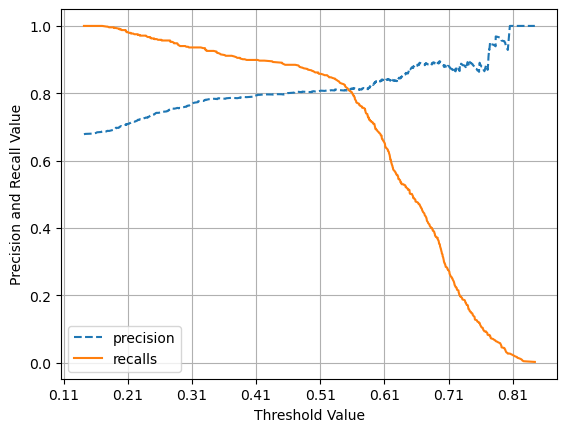

In [564]:
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    # plot precision
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    # plot recall
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recalls')

    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))

    plt.xlabel('Threshold Value'); plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()

precision_recall_curve_plot(y_test, gbc_clf.predict_proba(X_test)[:,1])

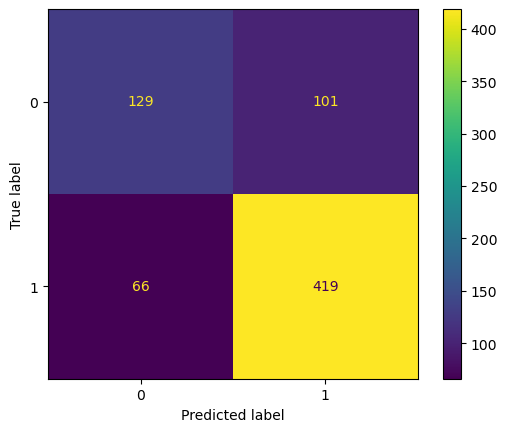

In [566]:
gbdt_predictions=gbc_clf.predict(X_test)
cm = confusion_matrix(y_test,gbdt_predictions)
ConfusionMatrixDisplay(cm).plot()
plt.show()

### Classification Report for GBDT Boosting

In [567]:
print(classification_report(y_test, gbdt_predictions))

              precision    recall  f1-score   support

           0       0.66      0.56      0.61       230
           1       0.81      0.86      0.83       485

    accuracy                           0.77       715
   macro avg       0.73      0.71      0.72       715
weighted avg       0.76      0.77      0.76       715



## XGBoost Classifier with RandomizedSearchCV

In [579]:
params_for_xgb = {
        "n_estimators": [50,100,150,200],
        "max_depth" : [3, 4, 5, 7],
        "learning_rate": [0.001,0.005,0.01],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'colsample_bynode':[0.5,0.6,0.8],
        'colsample_bylevel':[0.5,0.6,0.8],
        'subsample':[0.5,0.75,1],
        'gamma':[0.1,0.2,0.3],
        'min_child_weight':[1, 5, 15, 200],
        'objective': ['binary:logistic','reg:logistic'],
        'reg_alpha':[0.5],
        'eval_metric':['auc','logloss','aucpr']
        }

In [580]:
xgb_clf=XGBClassifier()

In [581]:
import datetime as dt
random_search_xgb = RandomizedSearchCV(xgb_clf,
                                   param_distributions=params_for_xgb,
                                   n_iter=10,
                                   n_jobs=-1,
                                   cv=3,
                                   verbose=10)


start = dt.datetime.now()
random_search_xgb.fit(X_train_res, y_train_res)
end = dt.datetime.now()

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [582]:
random_search_xgb.cv_results_

{'mean_fit_time': array([0.10704708, 0.04221948, 0.12433354, 0.07412966, 0.05884274,
        0.14676245, 0.10073042, 0.178128  , 0.09531124, 0.02626204]),
 'std_fit_time': array([0.00529797, 0.00470168, 0.01059675, 0.00205411, 0.00215461,
        0.00595193, 0.00282114, 0.01964741, 0.00188054, 0.00124394]),
 'mean_score_time': array([0.00398914, 0.00266067, 0.00398946, 0.00232752, 0.00398954,
        0.00398882, 0.00398962, 0.00332435, 0.00332379, 0.00232744]),
 'std_score_time': array([2.97360213e-07, 4.70302644e-04, 1.94667955e-07, 4.70302644e-04,
        4.89903609e-07, 7.86741172e-07, 7.37000982e-07, 4.70134207e-04,
        4.70358870e-04, 4.70190333e-04]),
 'param_subsample': masked_array(data=[0.5, 0.75, 1, 1, 1, 0.75, 0.75, 1, 1, 0.75],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_reg_alpha': masked_array(data=[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,

In [583]:
print(random_search_xgb.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=0.8, colsample_bytree=0.6,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0.2, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=15, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [585]:
print("Model acc in Training",random_search_xgb.score(X_train_res, y_train_res))
print("Model acc in Testing",random_search_xgb.score(X_test, y_test))

Model acc in Training 0.7652519893899205
Model acc in Testing 0.7692307692307693
